<a href="https://colab.research.google.com/github/ihmon/ML_Quiz/blob/main/Python_Lecture_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#機械学習に(井元が)よく使うPythonの機能

機械学習でよく使う、知ってなければならない基礎について説明する。
ここでは次を学習する。
*   Python, numpy, pandasの基礎
*   ファイル操作
*   グラフの書き方

In [ ]:
import math
import numpy as np
import pandas as pd
import pandas_profiling
import pickle
from IPython.core.debugger import Pdb   # Pdb().set_trace()

In [ ]:
def funcTest(**wkdct):
  lst1 = []
  lst2 = []
  strWk = ''
  for k, v in wkdct.items():
    lst1.append(k)
    lst2.append(v)
    if type(v) is str:
      strValue = '\"' + str(v) + '\"'
    else:
      strValue = str(v)

    strWk = strWk + str(k) + '= ' + strValue + ', '

  return strWk


  print(len(lst1))

dct_1 = {'a': 100, 'b': 200, 'c': '300'}
print(funcTest(**dct_1))

'''
for i in range(num_buckets):
  for j in range(5):      
    hash_table2[i].append(i*j)
    print(i, hash_table2[i])
'''


a= 100, b= 200, c= "300", 


'\nfor i in range(num_buckets):\n  for j in range(5):      \n    hash_table2[i].append(i*j)\n    print(i, hash_table2[i])\n'

### Dictionary, Tuple基本操作

In [ ]:
# Dictionary型は、{key: value, key: value, ...}のような構成となる。
# key、valuseともデータ型は問わず、要素ごとにデータ型が異なっていても構わない。
# Tuple型は、(value, value, ...)のような構成となる。
# valuseのデータ型は問わず、要素ごとにデータ型が異なっていても構わない。
# ただし、定義後、要素の追加変更はできない。

# tuple型の宣言
tpl =  (1, 2, 'imoto')

# dict型の宣言
dic = {}
# とか、
dic = {1: tpl, 2: [10,20,30], '3': 300}

print(dic[1])
print(dic['3'])
print(len(dic))   # keyの数

# key自体を参照するには一旦list型に置き換えて取得する。
lst = list(dic.keys())
print(lst[0])

(1, 2, 'imoto')
300
3
1


In [ ]:
# ちなみに…
# 　全Keyが文字列で良ければ、dict()メソッドで下記のようにも書ける。
#   a, b, cは変数ではなく文字列（''で括らない）
dic_ = dict(a=10, b=10, c=10)
print(type(dic_))
print(dic_['a'])
print(dic_[a])     # ←これはエラー

<class 'dict'>
10


NameError: ignored

In [ ]:
# Dictionary型を使うと普通の言語のように配列っぽい変数操作が可能となる。
# int dic1[10] = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9};

dic1 = {i:i for i in range(10)}
print(dic1)
dic1[0] = 80
print(dic1[0] * dic1[9])

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
720


In [ ]:
# Dictionaryに登録された全Keyを取得する。

print(dic1.keys())
lst_keys = list(dic1.keys())
print(lst_keys)

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
# Dictionaryへ要素追加や上書き
# 追加要素は最後尾に追加される

dic1[10] = 100
dic1[11] = 110

print(dic1)

In [ ]:
#  Dictionaryの要素削除

# delコマンドで要素削除
del dic1[10]
print(dic1)

# popは指定keyのvaluseを取得し、要素削除
val = dic1.pop(11)
print(val)
print(dic1)


In [ ]:
# DictionaryをPandasのDataframeに変換

dic1 = {'key1': [1,2,3], 'key2': [4,5,6,7], 'key3': [8,9]}

df = pd.DataFrame.from_dict(dic1, orient='index')
# もしくは
df = pd.DataFrame(dic1.values(), index=dic1.keys())

# 行と列を入れ替え
# df = pd.DataFrame.from_dict(dic1, orient='index').T
# # もしくは
# df = pd.DataFrame(dic1.values(), index=dic1.keys()).T

print(df)

      0  1    2    3
key1  1  2  3.0  NaN
key2  4  5  6.0  7.0
key3  8  9  NaN  NaN


In [ ]:
# 内包表記でvalueを絶対値に編集

dct1 = {'PNo1524015': -0.317759801348072, 'C5111': -0.3160016260524994, 'TSts0x2000': -0.3103641328341127, \
        'C5240': -0.28666682458404097, 'Err12': -0.2866653395686386, 'Rlt3': -0.28248465309565707, 'C2637': -0.2600996372248456, \
        'C5013': -0.2497225642186972, 'C5010': -0.2497225642186972, 'C2673': -0.24840918576292947, 'MSts0': -0.2320492201340452, \
        'C2600': -0.16941699813923425, 'TSts0x10003009': -0.1297412442768635, 'Err3': -0.12448570321135795}

dct_abs = {k:abs(v) for k, v in dct1.items()}
print(dct1)
print(dct_abs)
lst = [v for k, v in dct1.items()]
print(lst)

{'PNo1524015': -0.317759801348072, 'C5111': -0.3160016260524994, 'TSts0x2000': -0.3103641328341127, 'C5240': -0.28666682458404097, 'Err12': -0.2866653395686386, 'Rlt3': -0.28248465309565707, 'C2637': -0.2600996372248456, 'C5013': -0.2497225642186972, 'C5010': -0.2497225642186972, 'C2673': -0.24840918576292947, 'MSts0': -0.2320492201340452, 'C2600': -0.16941699813923425, 'TSts0x10003009': -0.1297412442768635, 'Err3': -0.12448570321135795}
{'PNo1524015': 0.317759801348072, 'C5111': 0.3160016260524994, 'TSts0x2000': 0.3103641328341127, 'C5240': 0.28666682458404097, 'Err12': 0.2866653395686386, 'Rlt3': 0.28248465309565707, 'C2637': 0.2600996372248456, 'C5013': 0.2497225642186972, 'C5010': 0.2497225642186972, 'C2673': 0.24840918576292947, 'MSts0': 0.2320492201340452, 'C2600': 0.16941699813923425, 'TSts0x10003009': 0.1297412442768635, 'Err3': 0.12448570321135795}
[-0.317759801348072, -0.3160016260524994, -0.3103641328341127, -0.28666682458404097, -0.2866653395686386, -0.28248465309565707, -0

In [ ]:
import csv

# Dictonalyをcsvでファイル読書き
with open('dct.csv', 'w') as f:  
    writer = csv.writer(f)
    for k, v in dct_abs.items():
       writer.writerow([k, v])

In [ ]:
# DictonalyをPickleでファイル読書き
# List型でもarray型でもOK

wkfilename ="dict1.dictfile"
with open(wkfilename, 'wb') as f:   # Binaryで書出し
    pickle.dump(dic1, f)

with open(wkfilename, 'rb') as f:   # Binaryを読込み
    dic2 = pickle.load(f)

print(dic2)
print(type(dic2))

### List基本操作

In [ ]:
# list型の宣言
# list likeな変数は宣言しないと怒られる。
lst1 = list()

# 代入
lst0 = [0, 0, 0]
lst1 = [1, 2, 3]
lst2 = [[4, 5, 6], [7, 8, 9]]

# 確認
#print(type(lst1))
#print(len(lst1))
print(len(lst2))

2


In [ ]:
# 要素の追加
lst0.append(0)
print(lst0)
lst0.append([0, 'zero'])
print(lst0)

[0, 0, 0, 0]
[0, 0, 0, 0, [0, 'zero']]


In [ ]:
# 演算
#print(lst1 + lst2)
print(lst1 * 2)

In [ ]:
# mapによる要素の一括処理 1
def calc_double(n):
    return n * 2

## map(関数かlambda式, イテラブル変数)
## イテラブルコンテナ変数の要素が1個ずつ関数かLamda式で評価され、mapは１個ずつ出力する。
## list()はそれらを1個のリストにまとめる。

print(list(map(calc_double, lst1)))

[2, 4, 6]


In [ ]:
# mapによる要素の一括処理 2
print(list(map(lambda x: x * 2, lst1)))

[2, 4, 6]


In [ ]:
names = ['Alice', 'Bob', 'Charlie', 'Dick', 'Erick']
ages = [24, 50, 18, 21, 60]

print(list(map(lambda x: x[1], names)))
# イテラブルコンテナ変数の各要素をx[?]で指定する。
print(list(map(lambda x: str(x[1] + x[0]), names)))


## zip(イテラブル変数, イテラブル変数)
## ２つのイテラブルコンテナ変数それぞれの要素を先頭から１個ずつ引っ付けてタプルで１個ずつ出力する。
## ここではそれらをlist()に渡して１つのリストにまとめておる。
print(list(zip(names, ages)))

# タプルを分解して表示
for name, age in zip(names, ages):
    print(name, age)

['l', 'o', 'h', 'i', 'r']
['lA', 'oB', 'hC', 'iD', 'rE']
[('Alice', 24), ('Bob', 50), ('Charlie', 18), ('Dick', 21), ('Erick', 60)]
Alice 24
Bob 50
Charlie 18
Dick 21
Erick 60


In [ ]:
## filter(関数かlambda式, イテラブル変数)
## イテラブルコンテナ変数の要素1個ずつを関数かLamda式で評価し、Trueな要素を出力する。
## list()はそれらを1個のリストにまとめる。
print(list(filter(lambda x: x > 20, ages)))

In [ ]:
## list中のlistの2番目の要素(TransID)を抜き出す
lst_org = [['C5000 From64 To64 C2671 C2600 C2631 PNo1263101 C5150 C2630 PNo1263009 C2625 C6700 C2638 Err0', 912661377], \
           ['C2663 C2581 C2583 C2721 C2610 C2648 C5068', 912661244], \
           ['C2663 C2581 C2583 C2721 C2610 C2648 C5068 C2585 C2679 C2664 Rlt0 C2609 C2639 Err0', 912660917], \
           ['C2663 C2581 C2583 C2721 C2610 C2648 C5068 C2585 C2679 C2664 Rlt0 C2609 C2639 Err0 C2676 Rlt0 C2750 Hai0 TSts0xff Can0 MSts3 C2678 C2663 C2581', 912661207], \
           ['C2663 C2581 C2583 C2721 C2610 C2648 C5068 C2585 C2679 C2664 Rlt0 C2609 C2639 Err0 C2676 Rlt0 C2678', 906513714], \
           ['C2663 C2581', 912661257], \
           ['C2663 C2581 C2583 C2721 C2610 C2648 C5068 C2585 C2679 C2664 Rlt0 C2609 C2639 Err0', 912661042], \
           ['C2663 C2581 C2583 C2721 C2610 C2648 C5068 C2585 C2679 C2664 Rlt0 C2609 C2639 Err0 C2676 Rlt0 C2750 Hai0 TSts0xff Can0 MSts3 C2678 C2663 C2581 C2583 C2721 C2610 C2648 C5068 C2585 C2679 C2664 Rlt0 C2609 C2639 Err0', 912661018], \
           ['C2661 C2663 C2581 C2583 C2721 C2610 C2648', 912661173], \
           ['C2663 C2581 C2583 C2721 C2610 C2648 C5068', 912661238]]
#print(list(map(lambda x: x[1], lst_org[:3])))
print(list(map(lambda x: x[1], lst_org)))

[912661377, 912661244, 912660917, 912661207, 906513714, 912661257, 912661042, 912661018, 912661173, 912661238]


In [ ]:
lst0 = ["A", "B", "C", "D", "E"]
lst1 = [(1, 0.9861944317817688), (0, 0.9858509302139282), (4, 0.9853654503822327), (2, 0.9852038025856018), (3, 0.9851693511009216)]
lst2 = list(map(lambda x:x[1], lst1))
print(lst2)
# lst3 = list(lst0[i] for i in lst2)
# print(lst3)

[0.9861944317817688, 0.9858509302139282, 0.9853654503822327, 0.9852038025856018, 0.9851693511009216]


In [ ]:
## 二重リストの2番目のタプル要素を抜き出し、二重リストにする。

lst1 = [[(0, .1), (1, .2), (2, .3)], [(0, .4), (1, .5), (2, .6)], [(0, .7), (1, .8), (2, .9)], [(0, 1.0), (1, 1.1), (2, 1.2)]]

# ゴリゴリ鈍足処理
anslst = []
for i in range(len(lst1)):
    templst = []
    for j in range(len(lst1[0])):
        templst.append(lst1[i][j][1])
    
    anslst.append(templst)

print(anslst)   # [[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9], [1.0, 1.1, 1.2]]  This is what i want.

# map + lambda
anslst = list(map(lambda x: list(map(lambda x: x[1], x)), lst1))
print(anslst)   # [[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9], [1.0, 1.1, 1.2]]  This is what i want.

# list comprihension
anslst = [[x[1] for x in t] for t in lst1]
print(anslst)   # [[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9], [1.0, 1.1, 1.2]]  This is what i want.


In [ ]:
lst11 = [1,2,3,4]
lst22 = [5,6,7,8]
lst33 = [lst11[i] + lst22[i] for i in range(4)]
print(lst33)

[6, 8, 10, 12]


In [ ]:
matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
flat = [x for row in matrix for x in row]
print(flat)

## zip unpacking
matrix = [[1,2,3,4], [5,6,7,8], [9,10,11,12]]
sum = list([ sum( _ ) for _ in list(zip(*matrix))])
print(sum)

print(*matrix)   # アンパック
# [1, 2, 3, 4] [5, 6, 7, 8] [9, 10, 11, 12]
print(list(zip(*matrix)))   # ZIPでアンパックされた各リストの要素をタプルで返す。それをリストにしている
# [(1, 5, 9), (2, 6, 10), (3, 7, 11), (4, 8, 12)]

# 最初のlistの要素基準に残りを引き算する。
l1 = [[403, 105], [403, 100], [403, 92], [403, 95], [403, 89]]
diffelement1, diffelement2 = zip(*((abs(403 - x), abs(105 - y)) for x, y in l1[1:]))
# or
diffelement1, diffelement2 = zip(*((abs(l1[0][0] - x), abs(l1[0][1] - y)) for x, y in l1[1:]))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


TypeError: ignored

In [ ]:
# 最大値、2番に大きな値の取得とそのindexの取得
lst2 = [5, 5, 1, 2, 3]
print(f'max value: {max(lst2)}')

# setコンテナに入れると重複要素が自動的に除かれるのでこれなら汎用的に使える
print(f'max value: {sorted(set(lst2))[-1]}')    # ソートして一番最後の値でもOK
print(f'2nd value: {sorted(set(lst2))[-2]}')    # ソートすればn番目に大きな値が取れる

# 要素の値が取れればindexは簡単
val = sorted(set(lst2))[-1]
print(f'max index: {lst2.index(val)}')

max value: 5
max value: 5
2nd value: 3
max index: 0


In [ ]:
# スライス
lst3 = list(range(10))
#print(lst3)
print(lst3[-1:])
print(lst3[::-1])   # 順序入替え

[9]
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [ ]:
# list内包
lst4 = list(math.sqrt(x) for x in range(10))
print(lst4)

[0.0, 1.0, 1.4142135623730951, 1.7320508075688772, 2.0, 2.23606797749979, 2.449489742783178, 2.6457513110645907, 2.8284271247461903, 3.0]


In [ ]:
# 組み込み関数math.sqrt()をlambda式にすることも可能
lst4 = list(map(lambda x: x**0.5, range(10)))
print(lst4)

[0.0, 1.0, 1.4142135623730951, 1.7320508075688772, 2.0, 2.23606797749979, 2.449489742783178, 2.6457513110645907, 2.8284271247461903, 3.0]


In [ ]:
# 0 padding
lst1 = [54, 55, 56, 57, 1, 0, 0]
max_len = 10
lst0 = [0]*max_len
lst1 = lst1 + lst0

# list要素を比較　1以上か未満かでマスクする。
lst2 = [i > 0 for i in lst1]        # [True, True, True, True, True, False, False]
lst2 = [int(i > 0) for i in lst1]   # [1, 1, 1, 1, 1, 0, 0]
print(lst2)

# numpyだと array同士の比較
arr1 = np.array(lst1)
arr0 = np.zeros(len(lst1))
arr2 = (arr1 > arr0).astype(np.int32)
print(arr2)

In [ ]:
# 丸めるround
lst = [0.987654321, 3.192232823417438e-05, 2000.7654321]

#丸め込みは　round　を使用
new_lst = [round(lst[n], 5) for n in range(len(lst ))]

# [0.98765, 3e-05, 2000.76543]

### Numpy基本操作

In [ ]:
# Numpy
# list likeな変数は宣言しないと怒られる。
arr1 = []
print(type(arr1))

<class 'list'>


In [ ]:
lst1 = [1, 2, 3]
lst2 = [[4, 5, 6], [7, 8, 9]]

arr1 = np.array(lst1)
print(arr1)
print(arr1.shape)

arr2 = np.array(lst2)
print(arr2)
print(arr2.shape)

[1 2 3]
(3,)
[[4 5 6]
 [7 8 9]]
(2, 3)


In [ ]:
print(arr2[0][0])

4


In [ ]:
print(np.zeros((10,10)))

# とかshapeで指定
print(np.zeros((arr2.shape))))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
# 要素の追加
arr3 = np.append(arr2, arr2)   # 平坦化されてしまう。
print(arr3)
print(arr3.shape)

[4 5 6 7 8 9 4 5 6 7 8 9]
(12,)


In [ ]:
# 行列型のままにしておきたい。
# 1. 元の3列に戻したいなら
arr3 = arr3.reshape(arr3.shape[0]//3, 3)
print(arr3)
print(arr3.shape)

[[4 5 6]
 [7 8 9]
 [4 5 6]
 [7 8 9]]
(4, 3)


In [ ]:
# 2. そもそものappendメソッドで指定する。
# ただし、appendのarray型第一、第二引数の列次元数は一致してなければならない。
arr3 = np.append(arr2, arr2, axis=0)
print(arr3)
print(arr3.shape)

[[4 5 6]
 [7 8 9]
 [4 5 6]
 [7 8 9]]
(4, 3)


In [ ]:
# 要素を見る
#print(arr1[1])     #[1 2 3]のidex=1
#print(arr2[1,2])   #[[4 5 6] [7 8 9]]のidex=1のidex=2（言い換えると2行目の3列目）
print(arr2[:1])

[[4 5 6]]


In [ ]:
# スライス
# :, ::, :::の説明
#print(arr3)
print(arr3[0:2,:])

[[4 5 6]
 [7 8 9]]


In [ ]:
# 列、行の削除
#arr3 = np.arange(50).reshape(10,5)
#print(arr3)
# 2行目を削除
arr3_del = np.delete(arr3, 1, axis=1)
print(arr3_del)

[[4 6]
 [7 9]
 [4 6]
 [7 9]]


In [ ]:
# 1,3行目を削除　複数行の削除はリストで指定する。スライスは使えない。
#arr3_del = np.delete(arr3, [1, 5], axis=0)
#スライスで複数行を削除するときはslice()オブジェクトで指定する。 slice(1, 4, 2) = 1::2
#arr3_del = np.delete(arr3, slice(1, 4), axis=0)
arr3_del = np.delete(arr3, slice(1, None, 2), axis=0)
print(arr3_del)

[[4 5 6]
 [4 5 6]]


In [ ]:
# 四則演算
print(arr2 * 2)

[[ 8 10 12]
 [14 16 18]]


In [ ]:
# 行列演算
arr4 = np.array([[1, -1]])
print(arr4)
arr4_T = arr4.T    # このままでは掛けられないので、転置行列にする。
print(arr4_T)
arr4x2 = arr4_T * arr2
print(arr4x2)

[[ 1 -1]]
[[ 1]
 [-1]]
[[ 4  5  6]
 [-7 -8 -9]]


In [ ]:
# マスク
print(arr3)
print(arr3 >= 6)
print(arr3 * (arr3 >= 10))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]
 [35 36 37 38 39]
 [40 41 42 43 44]
 [45 46 47 48 49]]
[[False False False False False]
 [False  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]
 [35 36 37 38 39]
 [40 41 42 43 44]
 [45 46 47 48 49]]


In [ ]:
# 結合
arr4_1 = np.arange(20).reshape(10,2)
arr4_2 = np.arange(20,40).reshape(10,2)
#print(arr4_2)
#arr4_3 = np.hstack([arr4_1, arr4_2])
#print(arr4_3)
arr4_4 = np.vstack([arr4_1, arr4_2])
print(arr4_4)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]
 [24 25]
 [26 27]
 [28 29]
 [30 31]
 [32 33]
 [34 35]
 [36 37]
 [38 39]]


In [ ]:
# 内包型でいったんlist型にするやりかた
lst = [[x_new1[i][0], x_new1[i][1], y_new1[i], sco1[i]] for i in range(1000)]


In [ ]:
# 次元の追加と削除
arr5_org = np.arange(20).reshape(5,4)

arr5_1 = np.expand_dims(arr5_org, axis=0)  # axisは追加する列の位置
print(f'Shape: {arr5_1.shape}')
print(arr5_1)

# 以下でも追加できるが、5,4を決め打ちしないといけないので使いにくい
arr5_2 = arr5_org.reshape(1,5,4)
print(f'Shape: {arr5_2.shape}')
print(arr5_2)

# shapeが1の次元が一度に削除される。
arr5_3 = np.squeeze(arr5_1)
print(f'Shape: {arr5_3.shape}')
print(arr5_3)

Shape: (1, 5, 4)
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]
  [16 17 18 19]]]
Shape: (1, 5, 4)
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]
  [16 17 18 19]]]
Shape: (5, 4)
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


In [ ]:
from numpy import random

# 乱数
# random.seed(10)
rnd = random.rand()

arr_rnd = random.rand(2, 3)
print(arr_rnd)
arr_rnd = random.rand(2)
print(arr_rnd)

# 整数の一様乱数
rnd = np.random.randint(0, 20, (4, 6))
print(rnd)
rnd = np.random.randint(0, 20, (4,))
print(rnd)

# 正規分布に沿った乱数
# normal(平均, 標準偏差, サイズ)
arr_nmlrnd = random.normal(-2, 0.5, (2, 3))
print(arr_nmlrnd)

[[0.82690236 0.67978573 0.26942989]
 [0.95691278 0.98339226 0.29677764]]
[0.61948645 0.17089122]
[[ 5 14 15 15 10 19]
 [ 2  0 13  3  8  4]
 [ 7 17  0 15  5 15]
 [ 1 15 15 18 18  7]]
[ 4 11 10 13]
[[-2.26215117 -1.66209142 -2.21831274]
 [-2.4326167  -1.85997551 -2.42168738]]


In [ ]:
# シャッフル
arr = np.array(range(32)).reshape(8, 4)
print(arr)
random.seed(30)
random.shuffle(arr)
print(arr)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]
[[12 13 14 15]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [ 0  1  2  3]
 [16 17 18 19]
 [24 25 26 27]
 [28 29 30 31]
 [20 21 22 23]]


In [ ]:
# キャスト
arr_rnd = arr_rnd *100
#arr_rnd1 = arr_rnd.astype(np.int32)
#print(arr_rnd1)

arr_rnd2 = np.array(arr_rnd, dtype = np.int32)
arr_rnd2 = np.array(arr_rnd, dtype = 'int32')
print(arr_rnd2)

[[ 207 6336 7488]
 [4985 2247 1980]]


In [ ]:
# ソート（任意の1列をソートし、他の列はその入替に追従して入れ替わる）
arr = np.array([[20, 3, 100, -1], [1, 200, 30, -2], [300, 10, 2, -3]])
print(f'origin:\n {arr}')

clm_num = 1
arr_sorted = arr[np.argsort(arr[:, clm_num])]
print(f'昇順:\n {arr_sorted}')

clm_num = 1
arr_sorted = arr[np.argsort(arr[:, clm_num])[::-1]]
print(f'降順:\n {arr_sorted}')


origin:
 [[ 20   3 100  -1]
 [  1 200  30  -2]
 [300  10   2  -3]]
昇順:
 [[ 20   3 100  -1]
 [300  10   2  -3]
 [  1 200  30  -2]]
降順:
 [[  1 200  30  -2]
 [300  10   2  -3]
 [ 20   3 100  -1]]


In [ ]:
# ソート（任意の1行をソートし、他の行はその入替に追従して入れ替わる）
arr = np.array([[20, 3, 100, -1], [1, 200, 30, -2], [300, 10, 2, -3]])
print(f'origin:\n {arr}')

clm_row = 1
arr_sorted = arr[:, np.argsort(arr[clm_row])]
print(f'昇順:\n {arr_sorted}')

clm_row = 1
arr_sorted = arr[:, np.argsort(arr[clm_row])[::-1]]
print(f'降順:\n {arr_sorted}')

origin:
 [[ 20   3 100  -1]
 [  1 200  30  -2]
 [300  10   2  -3]]
昇順:
 [[ -1  20 100   3]
 [ -2   1  30 200]
 [ -3 300   2  10]]
降順:
 [[  3 100  20  -1]
 [200  30   1  -2]
 [ 10   2 300  -3]]


###Pandas基本操作
行・列の指定方法yがわかりやすい
https://www.yutaka-note.com/entry/pandas_access


In [ ]:
lst_org = [[10,20,30,40],[11,21,31,41],[12,22,32,42],[13,23,33,43],[14,24,34,44]]
df_1 = pd.DataFrame(lst_org, columns=["A", "B", "C", "D"])
print(df_1)
print(df_1.describe())

    A   B   C   D
0  10  20  30  40
1  11  21  31  41
2  12  22  32  42
3  13  23  33  43
4  14  24  34  44
               A          B          C          D
count   5.000000   5.000000   5.000000   5.000000
mean   12.000000  22.000000  32.000000  42.000000
std     1.581139   1.581139   1.581139   1.581139
min    10.000000  20.000000  30.000000  40.000000
25%    11.000000  21.000000  31.000000  41.000000
50%    12.000000  22.000000  32.000000  42.000000
75%    13.000000  23.000000  33.000000  43.000000
max    14.000000  24.000000  34.000000  44.000000


In [ ]:
df_1['A'] = df_1['A'].replace(10,0)
df_1['A']

0     0
1    11
2    12
3    13
4    14
Name: A, dtype: int64

In [ ]:
# 1行の参照
# rtn_1 = df_1.iloc[1]
# print(rtn_1)
# print(type(rtn_1))  # 1行を指定したのでSeries形で返る
# print(list(rtn_1))  
# print(np.array(rtn_1))  

# # n行の参照
# rtn_2 = df_1.iloc[:3]  # スライサの使い方はpython流
# print(rtn_2)
# print(type(rtn_2))  # n行を指定したのでDataFrame型で返る
# print(np.array(rtn_2)) # listにはキャストできない

# 離れた2行の参照
rtn_2 = df_1.iloc[[0, 2]]  # []にlist型で指定
print(rtn_2)
print(type(rtn_2))  # 2行を指定したのでDataFrame型で返る
print(np.array(rtn_2)) # listにはキャストできない

    A   B   C   D
0  10  20  30  40
2  12  22  32  42
<class 'pandas.core.frame.DataFrame'>
[[10 20 30 40]
 [12 22 32 42]]


In [ ]:
# 列の参照
rtn_1 = df_1["A"] # []内に直接指定　下でもOK
rtn_1 = df_1.A    # 気持ち悪いけど
print(rtn_1)
print(type(rtn_1))  # 1列を指定したのでSeries形で返る

# n列の参照
rtn_2 = df_1[["A","D","C"]] # []にlist型で指定
print(rtn_2)
print(type(rtn_2))  # n列を指定したのでDataFrame型で返る

# n列の参照（これも同じ）
rtn_2 = df_1.loc[:,["A","D","C"]]   # 全行をlocで指定
print(rtn_2)

rtn_2 = df_1[["A"]]  # 因みに、1列しか指定してないがlistなので戻りはDataFrame型
print(type(rtn_2))


0    10
1    11
2    12
3    13
4    14
Name: A, dtype: int64
<class 'pandas.core.series.Series'>
    A   D   C
0  10  40  30
1  11  41  31
2  12  42  32
3  13  43  33
4  14  44  34
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
    A   D   C
0  10  40  30
1  11  41  31
2  12  42  32
3  13  43  33
4  14  44  34


In [ ]:
# index番号で1列参照
rtn_1 = df_1.iloc[:,1]  # 全行について、1列目
print(type(rtn_1))  # 1列を指定したのでSeries型で返る

# index番号でn列参照
rtn_1 = df_1.iloc[:,:4]  # 全行について、n列
print(type(rtn_1))  #  n列を指定したのでDataFrame型で返る
print(rtn_1)

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
    A   B   C   D
0  10  20  30  40
1  11  21  31  41
2  12  22  32  42
3  13  23  33  43
4  14  24  34  44


In [ ]:
lst = []
# index番号で1列参照
rtn_1 = df_1.iloc[:,1]  # 全行について、1列目
lst.append(list(rtn_1))  # 1列を指定したのでSeries型で返る

rtn_1 = df_1.iloc[:,3]  # 全行について、1列目
lst.append(list(rtn_1))  # 1列を指定したのでSeries型で返る

print(lst)
arr = np.array(lst).T
print(arr)

[[20, 21, 22, 23, 24], [40, 41, 42, 43, 44]]
[[20 40]
 [21 41]
 [22 42]
 [23 43]
 [24 44]]


In [ ]:
# 要素の参照（1個だけ）
rtn_1 = df_1.iat[1,1]   # loc, ilocよりもat, iatの方が高速
print(type(rtn_1))
print(rtn_1)

rtn_1 = df_1.at[1,"B"]   # loc, ilocよりもat, iatの方が高速
print(type(rtn_1))
print(rtn_1)

<class 'numpy.int64'>
21
<class 'numpy.int64'>
21


In [ ]:
# 列指定で最大値など
print(df_1['A'].max())
print(df_1[['A','B']].max())

# 列指定でソート
rtn_1 = df_1.sort_values(by="A", ascending=False)
print(rtn_1)

14
A    14
B    24
dtype: int64
    A   B   C   D
4  14  24  34  44
3  13  23  33  43
2  12  22  32  42
1  11  21  31  41
0  10  20  30  40


In [ ]:
# pdの複製
df_1 = pd.DataFrame(lst_org, columns=["A", "B", "C", "D"])
df_2 = df_1[["A", "D"]]   # 指定列のコピー

# 新しい列に複製
# df_2["NEW"] = df_1["C"]   # これは警告が出る。
df_2.loc[:, "NEW"] = list([30, 31, 32, 33, 34])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
df_2
print(list(df_1["C"]))

[30, 31, 32, 33, 34]


In [ ]:
# 辞書型を新しい行として挿入
dct1 = {0: 0.48484848484848486, 1: 0.2727272727272727, 2: 0.30303030303030304, 3: 0.18181818181818182, 4: 0.09090909090909091, 5: 0.12121212121212122, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.15151515151515152, 9: 0.06060606060606061, 10: 0.09090909090909091, 11: 0.030303030303030304, 12: 0.06060606060606061, 13: 0.15151515151515152, 14: 0.06060606060606061, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 19: 0.09090909090909091, 20: 0.06060606060606061, 21: 0.06060606060606061, 22: 0.06060606060606061, 23: 0.15151515151515152, 24: 0.09090909090909091, 25: 0.09090909090909091, 26: 0.06060606060606061, 27: 0.12121212121212122, 28: 0.09090909090909091, 29: 0.12121212121212122, 30: 0.12121212121212122, 31: 0.18181818181818182, 32: 0.36363636363636365, 33: 0.5151515151515151}
dct2 = {0: 0.3554834941851943, 1: 0.2659538704545025, 2: 0.31718938996844476, 3: 0.2111740783205706, 4: 0.07596645881657382, 5: 0.07948057788594247, 6: 0.07948057788594247, 7: 0.17095511498035434, 8: 0.2274050914716605, 9: 0.10267519030637758, 10: 0.07596645881657381, 11: 0.05285416945233648, 12: 0.08425192086558088, 13: 0.22646969838808148, 14: 0.10140627846270832, 15: 0.10140627846270832, 16: 0.023634794260596875, 17: 0.09239675666845953, 18: 0.10140627846270832, 19: 0.14791134007618667, 20: 0.10140627846270832, 21: 0.09239675666845953, 22: 0.10140627846270832, 23: 0.15012328691726787, 24: 0.05705373563802805, 25: 0.05920820250279008, 26: 0.07558192219009324, 27: 0.13347932684333308, 28: 0.13107925627221215, 29: 0.13496528673866567, 30: 0.17476027834493085, 31: 0.19103626979791702, 32: 0.3086510477336959, 33: 0.373371213013235}

lst1 = []
# lst1 = [v for k, v in dct1.items()]
lst1.append([v for k, v in dct1.items()])
lst1.append([v for k, v in dct2.items()])
print(lst1)

# df_1 = pd.DataFrame(lst1)
df_1 = pd.DataFrame(columns=[i for i in range(34)])
df_1.loc['AAA'] = [v for k, v in dct1.items()]
df_1.loc['BBB'] = [v for k, v in dct2.items()]
print(df_1)


[[0.48484848484848486, 0.2727272727272727, 0.30303030303030304, 0.18181818181818182, 0.09090909090909091, 0.12121212121212122, 0.12121212121212122, 0.12121212121212122, 0.15151515151515152, 0.06060606060606061, 0.09090909090909091, 0.030303030303030304, 0.06060606060606061, 0.15151515151515152, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.09090909090909091, 0.06060606060606061, 0.06060606060606061, 0.06060606060606061, 0.15151515151515152, 0.09090909090909091, 0.09090909090909091, 0.06060606060606061, 0.12121212121212122, 0.09090909090909091, 0.12121212121212122, 0.12121212121212122, 0.18181818181818182, 0.36363636363636365, 0.5151515151515151], [0.3554834941851943, 0.2659538704545025, 0.31718938996844476, 0.2111740783205706, 0.07596645881657382, 0.07948057788594247, 0.07948057788594247, 0.17095511498035434, 0.2274050914716605, 0.10267519030637758, 0.07596645881657381, 0.05285416945233648, 0.08425192086558088, 0.226469698388

元は'D'列に'D0', 'D1'がラベル的にあり、それらを列にする。

    A   B   C   D1   D0
0  10  20  30   D1  NaN
1  11  21  31  NaN   D0
2  12  22  32  NaN   D0
3  13  23  33   D1  NaN
4  14  24  34   D1  NaN




In [ ]:
# 指定列名(clmn_name)の要素がラベルになっていて、そのラベル名を列名にして分割する。
def discrete_clmn(df_org, clmn_name):
    wkFlag = True
    clmn_lst = df_org[clmn_name].unique()
    for str_disc in clmn_lst:
        # 初回は結合できないので。
        if wkFlag == True:
            df_concat = df_org[df_org[clmn_name] == str_disc].rename(columns={clmn_name: str_disc})
            wkFlag = False
        else:
            df_wk = df_org[df_org[clmn_name] == str_disc].rename(columns={clmn_name: str_disc})
            df_concat = pd.concat([df_concat, df_wk]).sort_index()

    return df_concat


lst_org = [[10,20,30,'D1'],[11,21,31,'D0'],[12,22,32,'D0'],[13,23,33,'D1'],[14,24,34,'D1']]
df_1 = pd.DataFrame(lst_org, columns=['A', 'B', 'C', 'D'])
print(df_1)

df_2 = discrete_clmn(df_1, 'D')
print(df_2)

df_2.to_excel('test.xlsx', index=False)

    A   B   C   D
0  10  20  30  D1
1  11  21  31  D0
2  12  22  32  D0
3  13  23  33  D1
4  14  24  34  D1
    A   B   C   D1   D0
0  10  20  30   D1  NaN
1  11  21  31  NaN   D0
2  12  22  32  NaN   D0
3  13  23  33   D1  NaN
4  14  24  34   D1  NaN


分割対象列は別のパターン

In [ ]:
def discrete_clmn(df_org, clmn_name1, clmn_name2):
    wkFlag = True
    clmn_lst = df_org[clmn_name1].unique()
    for str_disc in clmn_lst:
        if wkFlag == True:
            df_concat = df_org[df_org[clmn_name1] == str_disc].rename(columns={clmn_name2: clmn_name2 + '_' + str_disc})
            wkFlag = False
        else:
            df_wk = df_org[df_org[clmn_name1] == str_disc].rename(columns={clmn_name2: clmn_name2 + '_' + str_disc})
            df_concat = pd.concat([df_concat, df_wk]).sort_index()

    return df_concat

lst_org = [[10,20,30,'D1'],[11,21,31,'D0'],[12,22,32,'D0'],[13,23,33,'D1'],[14,24,34,'D1'],[15,25,35,'D2']]
df_1 = pd.DataFrame(lst_org, columns=['A', 'B', 'C', 'D'])
print(df_1)
df = discrete_clmn(df_1, 'D', 'C')
print(df)

    A   B   C   D
0  10  20  30  D1
1  11  21  31  D0
2  12  22  32  D0
3  13  23  33  D1
4  14  24  34  D1
5  15  25  35  D2
    A   B  C_D1   D  C_D0  C_D2
0  10  20  30.0  D1   NaN   NaN
1  11  21   NaN  D0  31.0   NaN
2  12  22   NaN  D0  32.0   NaN
3  13  23  33.0  D1   NaN   NaN
4  14  24  34.0  D1   NaN   NaN
5  15  25   NaN  D2   NaN  35.0


列の入れ替え

In [ ]:
lst_org = [[10,20,30,40],[11,21,31,41],[12,22,32,42],[13,23,33,43],[14,24,34,44]]
df_1 = pd.DataFrame(lst_org, columns=["A", "B", "C", "D"])
print(df_1)

lst_clm = list(df_1.columns)
print(lst_clm)
lst_clm[-3], lst_clm[-1] = lst_clm[-1], lst_clm[-3]
print(lst_clm)

# columnsリスト指定で入替
df_2 = df_1.reindex(columns=lst_clm)
print(df_2)

    A   B   C   D
0  10  20  30  40
1  11  21  31  41
2  12  22  32  42
3  13  23  33  43
4  14  24  34  44
['A', 'B', 'C', 'D']
['A', 'D', 'C', 'B']
    A   D   C   B
0  10  40  30  20
1  11  41  31  21
2  12  42  32  22
3  13  43  33  23
4  14  44  34  24


列をコピーして追加

In [ ]:
print(df_1)

df_2 = df_1

df_1.loc[:,'C_copy'] = df_1.loc[:,'C']
print(df_1)


    A   B   C   D
0  10  20  30  40
1  11  21  31  41
2  12  22  32  42
3  13  23  33  43
4  14  24  34  44
    A   B   C   D  C_copy
0  10  20  30  40      30
1  11  21  31  41      31
2  12  22  32  42      32
3  13  23  33  43      33
4  14  24  34  44      34


各行において一番大きな値以外をnanに置き換える

In [ ]:
lst = list(df_1.loc[1,'A':'D'])
print(lst)
# print(lst.index(sorted(lst)[-1]))  # 一番目に大きな値のindex
# print(lst.index(sorted(lst)[-2]))  # 二番目に大きな値のindex

arr = np.zeros((len(lst)))
arr[:] = np.nan

arr[lst.index(sorted(lst)[-1])] = lst[lst.index(sorted(lst)[-1])]
arr[lst.index(sorted(lst)[-2])] = lst[lst.index(sorted(lst)[-2])]
print(arr)

df_1.loc[1,'A':'D'] = arr
print(df_1)

[11, 21, 31, 41]
[nan nan 31. 41.]
      A     B     C     D  C_copy
0  10.0  20.0  30.0  40.0      30
1   NaN   NaN  31.0  41.0      31
2  12.0  22.0  32.0  42.0      32
3  13.0  23.0  33.0  43.0      33
4  14.0  24.0  34.0  44.0      34


### ファイル操作

In [ ]:
import re
import numpy as np
import pandas as pd

lst_org = [[10,20,30,40],[11,21,31,41],[12,22,32,42],[13,23,33,43],[14,24,34,44]]
# Numpy


In [ ]:
# list型を保存
with open('savetxt.txt', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(savelst)

In [ ]:
# nparray型を保存
arr1 = np.array(lst_org, dtype=int)
np.savetxt('savetxt.txt', arr1, delimiter=',', fmt='%.3e')
#arr3_load = np.loadtxt('np_savetxt.txt', delimiter=',')
#print(arr3_load)

In [ ]:
# テキストで読み取る（1行ずつ）
wklst = []
with open('savetxt.txt', encoding='Shift-JIS') as f:
    for i, s_line in enumerate(f):
        #if i == 0: continue
        s_line = re.sub(r"[\n]", "", s_line)
        wktpl = tuple(s_line.split(','))
        wklst.append(wktpl)

print(wklst)

[('1.000e+01', '2.000e+01', '3.000e+01', '4.000e+01'), ('1.100e+01', '2.100e+01', '3.100e+01', '4.100e+01'), ('1.200e+01', '2.200e+01', '3.200e+01', '4.200e+01'), ('1.300e+01', '2.300e+01', '3.300e+01', '4.300e+01'), ('1.400e+01', '2.400e+01', '3.400e+01', '4.400e+01')]


In [ ]:
# 数値で読み取る
arr2 = np.loadtxt('savetxt.txt', delimiter=',')
print(arr2)

[[10. 20. 30. 40.]
 [11. 21. 31. 41.]
 [12. 22. 32. 42.]
 [13. 23. 33. 43.]
 [14. 24. 34. 44.]]


In [ ]:
# Pandas
# データフレームというオブジェクトにする
# header=None: 元ファイルにheaderはないですよ。
# index_col=0: 名無しのindex列があるので0番目の列にしてね。（これやらないと'Unnamed：0'という列ができる。）
df = pd.read_csv('savetxt.txt', sep=',', header=None, index_col=0)
print(df)

df = pd.read_csv('savetxt.txt', sep=',', names=('A', 'B', 'C', 'D'))
print(df)

      0     1     2     3
0  10.0  20.0  30.0  40.0
1  11.0  21.0  31.0  41.0
2  12.0  22.0  32.0  42.0
3  13.0  23.0  33.0  43.0
4  14.0  24.0  34.0  44.0
      A     B     C     D
0  10.0  20.0  30.0  40.0
1  11.0  21.0  31.0  41.0
2  12.0  22.0  32.0  42.0
3  13.0  23.0  33.0  43.0
4  14.0  24.0  34.0  44.0


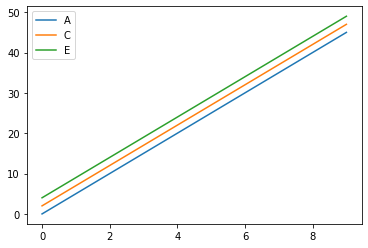

In [ ]:
# Pandasデータフレームの描画
df1.plot()

###グラフの書き方
https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
print(type(df1))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
arrRes = df1.values
xx = range(len(arrRes))
y1 = arrRes[:,1]
y2 = arrRes[:,2]

print(y1)

[ 2.  7. 12. 17. 22. 27. 32. 37. 42. 47.]


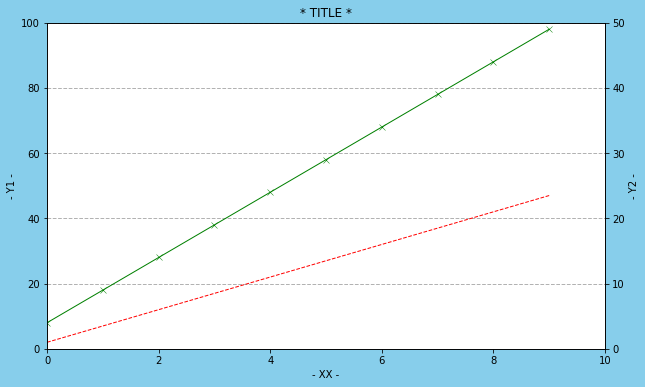

In [ ]:
# キャンバスみたいな台紙
fig = plt.figure(figsize=(10, 6),facecolor='skyblue')

# １軸目
ax = fig.add_subplot(111, xlim=(0.0, len(arrRes)), ylim=(0.0, 100.0), xlabel='- XX -', ylabel='- Y1 -')
ax.grid(which = 'major', axis = 'y', c = 'black', alpha = 0.3, linestyle = '--', linewidth = 1)
ax.plot(xx, y1, 'r', linewidth=1, linestyle='--')

# ２軸目
ax2 = ax.twinx()
ax2.set_ylim(0.0, 50.0)
ax2.set_ylabel('- Y2 -')
ax2.plot(xx, y2, 'g', linewidth=1, marker='x', markeredgewidth=0.5)

plt.title('* TITLE *')
plt.show()

In [ ]:
# 複数チャートを並べて作成
lst1 = [53.755656912209254, 49.50806195665656, 53.67899936767204, 49.73638113412574, 57.7348898297064, 52.392393897129075, 38.823485734712094, 48.11450912573554, 45.114477743148825, \
        58.597918564204534, 51.40464852127454, 34.26151397287511, 33.992786166276595, 51.59802949908048, 63.97243475325642, 59.65095446549289, 53.70132837495121, 47.42211112683533, \
        34.68731259190775, 46.957081541662724, 50.49015274795502, 42.24771242481779, 55.14022418467297, 53.72240027709602, 42.66732221165579, 48.37938712483465, 57.355814150847095, \
        37.731372260089756, 52.450385467833684, 50.29349820820334, 57.713390034749324, 46.27152377912176, 49.427246425103014, 48.94446131807638, 49.276526029252864, 59.03710220820054, \
        42.49599543518012, 47.944407454868504, 62.94465430079263, 52.081357590946595, 47.27706958815239, 38.350000371249244, 51.24324510959582, 52.6035436768333, 54.41720633668928, \
        54.885237403611434, 54.565083822807026, 39.80040678373472, 53.9890980912514, 51.93950644910413, 43.80218448094711, 58.85136191069049, 49.53580344162592, 54.68357476539743, \
        50.29388750681143, 48.73725997758867, 50.19892875349184, 60.269934840515994, 51.17536099387721, 52.93497756943311, 35.773387122017155, 49.938890209478224, 57.04864580371884, \
        59.20916498425328, 48.47445472671085, 45.21057315499713, 32.43541143683289, 47.652916400220136, 53.24552644649259, 56.313344577072776, 30.279609418467114, 52.499838438878115, \
        40.647543631621545, 50.89637771140652, 34.85184608837338, 55.92183444490115, 58.94808221985185, 55.14352529078534, 49.00496997751124, 34.36619915419391, 54.76466825142347, \
        56.505195905752494, 37.850917288171445, 25.35498574743496, 46.50470302672884, 38.23048785064423, 27.820712856053394, 42.7453643800846, 53.05477659832765, 61.25266892207392, \
        60.35492040574502, 63.10162722587345, 45.41357937975818, 43.80113570131095, 52.128674215194145, 47.06879783289946, 44.71992305319289, 45.802029977202075, 58.96198902566585, \
        44.765498890745, 37.04013994071059, 34.646996428883234, 55.86005274692508, 54.53041416860411, 42.19666753553837, 31.383202119456666, 56.206121254228385, 55.18026785967936, \
        36.34299608023993, 46.80207414955007, 39.901704100472664, 35.19408928085663, 40.92170459436118, 55.90328527920272, 46.761689784335594, 47.9148416629931, 38.17853097231592, \
        34.02990157339445, 46.95178090988916, 46.54999403585688, 41.70943562249088, 61.165399999307674, 46.55502279372291, 36.73797719672289, 54.7488819004632, 42.00972876612202, \
        51.60044586258203, 40.58516544510164, 44.37170489106282, 53.58642954381024, 46.732982588751426, 26.50791309820303, 42.546346494933225, 40.40607005519118, 62.33461367456585, \
        48.64354241829454, 52.65445862079072, 48.27438828644238, 52.267345130739585, 48.61376664372092, 55.35905034377354, 44.897871914278525, 41.53485416251675, 59.64974601507189, \
        32.80235374652852, 50.4843098378594, 53.77218879080391, 49.907184581433285, 39.83187918819976, 54.12029020037305, 64.1370009107792, 42.35801232503005, 32.218331951367084, \
        44.53920465745428, 34.43592975775649, 46.170109573767256, 46.069942476816145, 46.94986804677675, 47.695257897639436, 50.87066315113595, 44.02695624003282, 42.50663996682862, \
        44.04703742163421, 55.881067084532575, 41.83189410330238, 58.16945947824236, 42.28335104137811, 49.95796407825272, 48.40111326116572, 55.369459139320305, 41.588865661441204, \
        28.942535152986512, 52.680848129529245, 40.79287159561653, 46.06130100843513, 33.582247129297336, 53.825839145192, 45.02465360805742, 41.12301829628075, 50.09216018998652, \
        45.70165465042551, 48.607284421797445, 37.4239901056923, 53.25321856190421, 62.755823088013585, 32.86983922198025, 55.19686409849281, 51.36891810074856, 37.00155310591778, \
        53.278978179814104, 45.21770804953675, 55.3806958945056, 53.44417662593628, 50.95322322982733, 31.527699882384624, 54.475030751419595, 54.89845421522143, 48.689345950461664, \
        38.67484731100171, 56.53082255057004]

lst2 = [3, 3, 3, 6, 5, 4, 1, 2, 3, 5, 3, 3, 3, 2, 6, 5, 4, 5, 7, 3, 1, 3, 3, 3, 5, 3, 6, 6, 1, 6, 2, 6, 1, 4, 5, 6, 8, 4, 0, 3, 3, 1, 3, 1, 2, 7, 3, 0, 3, 0, 0, 3, 6, 2, 7, 9, 8, 4, \
        1, 3, 1, 3, 4, 7, 5, 1, 6, 6, 3, 8, 3, 0, 9, 9, 1, 4, 5, 4, 5, 2, 6, 8, 1, 3, 3, 1, 6, 3, 5, 8, 8, 4, 7, 3, 3, 3, 5, 7, 1, 1, 1, 3, 6, 3, 3, 8, 8, 5, 2, 6, 9, 2, 6, 3, 7, 5, \
        3, 3, 7, 1, 5, 1, 3, 5, 3, 4, 2, 1, 3, 3, 5, 6, 1, 3, 1, 7, 3, 1, 5, 5, 7, 3, 5, 3, 5, 2, 4, 1, 3, 9, 0, 3, 3, 3, 5, 3, 8, 4, 1, 2, 5, 5, 6, 4, 3, 4, 1, 5, 3, 1, 5, 1, 4, 5, \
        4, 1, 5, 7, 3, 7, 5, 7, 1, 7, 9, 3, 3, 9, 3, 3, 3, 3, 0, 0, 2, 5, 6, 3, 3, 4]

47.775649556628615


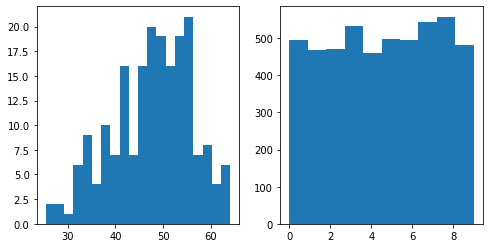

In [ ]:
lst2 = []
for i in range(100):
    lst2.append(np.random.randint(0,20, (10,)))

arr = np.ravel(np.array(lst2))
# lst2 = np.random.randint(0,10, (10,))

lst2 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 3, 3, 6, 3, 5, 7, 9, 5, 5, 0, 2, 9, 5, 8, 7, 0, 8, 0, 6, 0, 9, 2, 4, 4, 8, 2, 6, 4, 7, 3, 6, 7, 1, 2, 4, 5, 5, 8, 5, 6, 2, 8, 0, 7, 4, 1, 9, 9, 6, 3, 1, 2, 5, 8, 2, 6, 9, 4, 4, 8, 6, 5, 2, 3, 5, 4, 1, 7, 5, 0, 7, 3, 6, 5, 5, 5, 1, 9, 9, 8, 1, 1, 4, 7, 5, 0, 3, 9, 4, 3, 1, 2, 5, 4, 2, 9, 3, 6, 6, 2, 1, 8, 5, 1, 0, 7, 3, 0, 9, 6, 6, 5, 1, 8, 0, 6, 7, 9, 7, 1, 1, 4, 1, 8, 5, 3, 1, 2, 1, 0, 6, 8, 9, 7, 4, 1, 2, 8, 6, 0, 9, 0, 7, 6, 5, 4, 1, 2, 6, 6, 2, 7, 3, 8, 4, 5, 7, 6, 0, 4, 3, 5, 7, 4, 4, 7, 2, 1, 3, 7, 0, 3, 2, 4, 1, 3, 8, 8, 4, 3, 9, 8, 5, 1, 1, 1, 8, 5, 0, 9, 4, 7, 8, 1, 1, 3, 6, 7, 7, 3, 3, 7, 6, 2, 5, 6, 4, 8, 1, 7, 2, 4, 9, 0, 3, 3, 0, 7, 4, 3, 0, 8, 5, 5, 0, 3, 5, 9, 0, 0, 8, 6, 3, 6, 9, 9, 2, 3, 2, 3, 9, 3, 8, 3, 6, 3, 2, 1, 8, 3, 7, 0, 0, 7, 9, 0, 2, 6, 1, 9, 5, 2, 9, 3, 2, 4, 5, 2, 5, 7, 4, 8, 2, 8, 6, 5, 5, 1, 3, 9, 7, 6, 1, 0, 9, 1, 8, 7, 3, 7, 2, 3, 9, 0, 1, 9, 8, 7, 8, 6, 9, 4, 6, 6, 4, 4, 8, 4, 1, 8, 9, 2, 0, 0, 5, 9, 0, 0, 6, 2, 6, 0, 3, 4, 5, 5, 9, 5, 2, 0, 4, 4, 3, 6, 6, 9, 2, 7, 0, 0, 7, 2, 1, 3, 3, 3, 6, 1, 5, 6, 0, 8, 9, 1, 2, 6, 4, 1, 8, 2, 5, 4, 1, 9, 0, 1, 8, 0, 3, 8, 7, 0, 8, 9, 9, 3, 9, 6, 3, 6, 5, 2, 9, 5, 3, 6, 3, 5, 0, 5, 1, 0, 7, 7, 2, 4, 4, 9, 4, 9, 9, 0, 7, 3, 8, 7, 0, 9, 4, 7, 6, 2, 5, 6, 6, 1, 7, 7, 0, 1, 1, 6, 2, 6, 6, 6, 7, 3, 7, 8, 6, 6, 5, 8, 8, 2, 8, 8, 7, 2, 3, 6, 1, 1, 4, 6, 0, 9, 6, 0, 0, 8, 0, 7, 4, 8, 7, 6, 5, 6, 6, 1, 0, 8, 8, 3, 6, 7, 3, 4, 3, 6, 8, 7, 6, 1, 6, 6, 8, 3, 6, 6, 4, 0, 9, 8, 7, 0, 5, 7, 6, 7, 9, 3, 1, 2, 5, 5, 5, 5, 3, 0, 3, 0, 5, 7, 9, 8, 9, 9, 3, 6, 9, 1, 7, 9, 8, 1, 9, 5, 1, 1, 5, 1, 8, 7, 7, 2, 2, 0, 6, 1, 0, 7, 6, 2, 5, 9, 7, 3, 8, 2, 8, 4, 0, 7, 9, 8, 2, 5, 4, 2, 9, 4, 5, 3, 2, 7, 9, 6, 3, 4, 1, 7, 2, 4, 3, 0, 0, 7, 5, 7, 2, 9, 8, 9, 6, 4, 3, 7, 1, 0, 1, 8, 9, 0, 3, 0, 1, 2, 9, 7, 2, 8, 3, 8, 5, 5, 4, 3, 3, 7, 9, 2, 8, 7, 2, 1, 9, 0, 0, 8, 3, 1, 6, 4, 4, 0, 6, 0, 5, 9, 4, 4, 1, 1, 3, 5, 5, 4, 0, 7, 0, 3, 8, 8, 4, 7, 3, 5, 1, 8, 0, 4, 3, 7, 6, 9, 0, 5, 2, 1, 3, 1, 8, 5, 1, 9, 6, 4, 0, 6, 2, 7, 7, 7, 3, 3, 2, 8, 4, 7, 7, 5, 0, 1, 9, 2, 7, 7, 6, 9, 9, 2, 5, 4, 8, 1, 0, 7, 7, 9, 0, 1, 1, 5, 6, 8, 4, 9, 3, 6, 3, 3, 0, 7, 2, 0, 6, 9, 6, 6, 4, 8, 0, 3, 0, 7, 8, 9, 8, 6, 1, 4, 6, 5, 1, 5, 8, 8, 2, 8, 4, 9, 2, 6, 7, 9, 1, 7, 5, 7, 4, 6, 3, 1, 0, 5, 7, 0, 4, 7, 0, 9, 8, 2, 3, 7, 4, 5, 5, 9, 7, 4, 9, 6, 8, 5, 8, 8, 5, 7, 0, 6, 5, 6, 5, 2, 2, 1, 1, 0, 5, 3, 5, 0, 9, 5, 8, 3, 4, 7, 4, 2, 8, 3, 0, 0, 7, 1, 3, 6, 4, 4, 1, 7, 8, 7, 6, 8, 8, 5, 5, 2, 7, 5, 8, 2, 7, 8, 1, 5, 2, 7, 1, 2, 3, 6, 6, 4, 6, 3, 0, 7, 3, 4, 3, 4, 5, 9, 1, 8, 0, 1, 4, 0, 7, 3, 9, 0, 4, 6, 9, 7, 5, 9, 4, 5, 1, 4, 5, 7, 1, 9, 7, 7, 1, 8, 4, 0, 7, 3, 1, 4, 2, 6, 3, 2, 6, 3, 8, 8, 3, 4, 2, 3, 3, 6, 3, 0, 4, 8, 8, 7, 1, 0, 5, 0, 6, 6, 4, 9, 8, 8, 8, 8, 3, 3, 0, 2, 0, 0, 3, 2, 3, 6, 7, 2, 5, 0, 6, 1, 0, 0, 0, 0, 2, 1, 6, 6, 7, 4, 3, 2, 9, 4, 1, 7, 9, 3, 3, 7, 3, 6, 5, 3, 9, 7, 6, 7, 2, 8, 4, 5, 8, 2, 1, 1, 9, 1, 8, 3, 7, 3, 7, 0, 8, 1, 9, 2, 3, 3, 0, 9, 2, 3, 2, 8, 9, 9, 4, 1, 6, 8, 9, 3, 6, 3, 3, 2, 2, 4, 7, 7, 7, 0, 5, 8, 1, 4, 1, 2, 7, 3, 2, 2, 1, 6, 7, 7, 2, 5, 8, 5, 1, 0, 5, 7, 8, 0, 9, 4, 2, 6, 8, 8, 0, 2, 1, 4, 7, 1, 7, 9, 3, 1, 8, 7, 8, 2, 3, 1, 1, 0, 2, 7, 2, 8, 8, 8, 3, 0, 0, 8, 3, 8, 3, 4, 4, 5, 6, 2, 8, 7, 6, 1, 3, 0, 7, 0, 9, 2, 4, 8, 6, 2, 5, 0, 6, 6, 2, 3, 4, 5, 9, 1, 2, 8, 7, 1, 8, 7, 3, 2, 3, 6, 9, 4, 9, 6, 7, 3, 6, 8, 3, 6, 3, 8, 5, 2, 1, 1, 5, 7, 1, 7, 2, 2, 8, 1, 6, 7, 0, 4, 7, 9, 0, 5, 3, 4, 4, 8, 4, 5, 4, 6, 6, 6, 0, 0, 2, 9, 9, 4, 3, 8, 0, 8, 3, 7, 9, 1, 3, 7, 3, 8, 8, 4, 1, 7, 6, 2, 5, 7, 3, 8, 9, 5, 4, 3, 2, 4, 8, 2, 3, 8, 3, 9, 7, 3, 0, 1, 5, 9, 1, 8, 7, 3, 7, 2, 4, 2, 8, 7, 9, 3, 0, 2, 0, 8, 8, 9, 2, 0, 0, 2, 5, 9, 9, 6, 7, 5, 4, 6, 9, 8, 0, 1, 0, 2, 5, 2, 5, 3, 0, 9, 7, 5, 4, 8, 3, 3, 8, 8, 0, 8, 4, 3, 7, 0, 2, 7, 6, 8, 1, 2, 5, 8, 3, 2, 1, 6, 7, 6, 6, 5, 1, 6, 0, 8, 5, 5, 8, 2, 1, 8, 8, 1, 4, 1, 3, 4, 5, 7, 6, 8, 6, 2, 8, 3, 5, 0, 0, 4, 3, 0, 7, 9, 5, 6, 2, 6, 0, 8, 6, 0, 6, 3, 3, 1, 3, 7, 1, 9, 7, 5, 9, 2, 3, 3, 6, 6, 7, 9, 2, 4, 8, 3, 1, 2, 0, 8, 0, 9, 0, 0, 1, 0, 5, 1, 6, 4, 6, 3, 9, 9, 6, 3, 6, 5, 7, 9, 3, 0, 1, 7, 8, 6, 8, 6, 6, 6, 4, 3, 9, 1, 4, 6, 5, 9, 6, 1, 9, 1, 6, 6, 2, 8, 4, 9, 8, 1, 1, 4, 5, 9, 7, 4, 7, 7, 9, 5, 3, 6, 4, 3, 8, 7, 9, 1, 9, 3, 9, 6, 2, 9, 3, 4, 4, 4, 3, 3, 7, 7, 4, 7, 9, 5, 4, 3, 0, 2, 3, 9, 6, 5, 9, 0, 6, 3, 7, 4, 8, 2, 6, 8, 8, 7, 2, 6, 4, 7, 3, 1, 5, 6, 0, 0, 4, 8, 6, 1, 3, 5, 8, 4, 5, 3, 4, 3, 3, 9, 2, 6, 0, 1, 5, 4, 7, 7, 8, 5, 6, 8, 0, 5, 1, 8, 3, 7, 5, 5, 2, 9, 9, 9, 3, 6, 4, 0, 7, 8, 2, 9, 9, 8, 7, 0, 5, 5, 8, 1, 9, 3, 7, 4, 6, 5, 6, 5, 9, 7, 5, 5, 8, 0, 2, 2, 5, 6, 6, 1, 5, 8, 0, 3, 1, 3, 4, 7, 0, 8, 7, 4, 5, 8, 6, 5, 8, 9, 4, 6, 9, 2, 9, 8, 3, 4, 7, 2, 2, 5, 1, 5, 5, 8, 8, 1, 3, 7, 5, 0, 1, 5, 0, 8, 9, 3, 8, 0, 2, 8, 0, 6, 6, 5, 6, 3, 3, 3, 7, 5, 8, 3, 0, 1, 7, 5, 3, 0, 7, 1, 0, 7, 7, 1, 4, 8, 0, 6, 9, 1, 8, 6, 3, 9, 7, 7, 3, 8, 8, 9, 9, 2, 7, 8, 8, 4, 9, 9, 8, 9, 4, 3, 0, 5, 2, 9, 8, 2, 6, 6, 7, 5, 2, 0, 0, 2, 9, 5, 8, 1, 4, 0, 5, 9, 0, 5, 2, 6, 9, 1, 4, 3, 5, 7, 1, 1, 9, 0, 4, 9, 7, 8, 4, 2, 6, 7, 7, 4, 5, 3, 9, 1, 0, 4, 0, 4, 5, 1, 8, 0, 7, 0, 8, 8, 4, 7, 3, 7, 8, 4, 8, 1, 3, 6, 6, 3, 4, 6, 4, 2, 8, 2, 2, 0, 2, 8, 4, 6, 2, 1, 9, 8, 3, 4, 6, 0, 8, 1, 0, 8, 5, 6, 0, 9, 6, 1, 1, 9, 7, 1, 3, 9, 3, 8, 9, 3, 0, 8, 7, 4, 4, 1, 5, 3, 6, 2, 5, 6, 8, 3, 1, 5, 6, 8, 8, 9, 1, 2, 6, 4, 2, 1, 3, 9, 0, 8, 1, 2, 0, 3, 0, 6, 0, 7, 0, 1, 5, 7, 2, 1, 0, 7, 4, 3, 7, 6, 3, 2, 2, 6, 4, 5, 2, 9, 0, 4, 5, 1, 7, 9, 8, 8, 0, 8, 8, 5, 7, 6, 3, 2, 5, 7, 0, 9, 2, 2, 5, 1, 8, 8, 7, 2, 6, 5, 9, 9, 5, 8, 9, 1, 1, 4, 3, 6, 8, 8, 6, 1, 0, 0, 1, 2, 5, 4, 8, 3, 6, 1, 3, 1, 1, 2, 9, 4, 6, 2, 4, 2, 2, 3, 7, 5, 8, 8, 3, 9, 2, 3, 2, 4, 7, 3, 5, 5, 7, 7, 8, 2, 6, 5, 9, 0, 3, 9, 1, 3, 7, 5, 3, 9, 5, 4, 7, 4, 5, 7, 9, 2, 0, 9, 6, 0, 5, 4, 7, 0, 6, 7, 2, 2, 2, 5, 4, 4, 0, 3, 0, 8, 6, 2, 9, 9, 3, 8, 7, 5, 8, 7, 4, 5, 9, 3, 2, 9, 9, 3, 4, 6, 5, 6, 8, 1, 7, 8, 1, 4, 6, 5, 3, 9, 8, 7, 7, 6, 3, 7, 1, 4, 5, 6, 7, 9, 5, 2, 5, 7, 0, 4, 1, 3, 5, 3, 2, 1, 8, 0, 8, 4, 1, 0, 6, 1, 6, 6, 9, 6, 7, 6, 6, 3, 4, 6, 5, 2, 1, 2, 7, 9, 8, 8, 9, 2, 5, 8, 4, 6, 4, 1, 9, 1, 2, 6, 7, 1, 1, 2, 1, 3, 1, 8, 4, 4, 2, 9, 7, 2, 2, 5, 2, 1, 8, 8, 6, 4, 4, 1, 5, 3, 6, 8, 1, 0, 6, 8, 3, 3, 4, 0, 8, 6, 5, 1, 8, 2, 9, 4, 0, 3, 4, 5, 8, 9, 6, 2, 0, 8, 8, 5, 2, 3, 7, 6, 4, 4, 4, 5, 5, 2, 1, 1, 6, 4, 5, 7, 3, 4, 4, 5, 0, 5, 9, 1, 1, 4, 8, 9, 8, 1, 8, 0, 2, 0, 0, 8, 0, 7, 5, 1, 5, 5, 0, 0, 0, 9, 9, 5, 4, 1, 2, 9, 5, 9, 7, 1, 5, 1, 3, 8, 5, 6, 1, 6, 7, 5, 4, 3, 5, 0, 9, 9, 4, 9, 3, 5, 9, 6, 3, 2, 6, 2, 7, 9, 6, 6, 3, 6, 1, 9, 7, 0, 5, 8, 8, 7, 2, 8, 1, 5, 6, 2, 1, 4, 0, 1, 7, 7, 1, 0, 8, 1, 9, 3, 9, 5, 7, 7, 7, 9, 8, 7, 7, 3, 3, 6, 3, 7, 0, 7, 3, 6, 7, 7, 3, 5, 7, 1, 7, 1, 6, 2, 6, 3, 9, 9, 7, 6, 3, 1, 4, 5, 4, 6, 4, 6, 1, 8, 1, 7, 9, 7, 3, 8, 8, 7, 8, 2, 2, 2, 1, 6, 6, 0, 3, 3, 8, 1, 8, 6, 3, 7, 0, 0, 6, 6, 0, 3, 9, 1, 9, 4, 8, 8, 5, 7, 5, 4, 7, 2, 8, 1, 7, 2, 5, 3, 6, 5, 9, 1, 0, 7, 5, 3, 3, 7, 6, 5, 4, 5, 9, 6, 1, 5, 8, 9, 0, 5, 9, 7, 1, 9, 6, 1, 7, 2, 7, 7, 7, 2, 5, 2, 9, 7, 7, 5, 0, 5, 8, 8, 7, 5, 8, 3, 8, 9, 3, 9, 0, 3, 8, 0, 2, 4, 0, 4, 7, 0, 7, 0, 4, 3, 4, 5, 3, 3, 4, 3, 5, 5, 1, 2, 8, 1, 2, 8, 8, 1, 6, 8, 3, 1, 4, 2, 1, 0, 2, 7, 2, 9, 7, 1, 7, 8, 7, 8, 3, 5, 5, 9, 5, 9, 6, 0, 8, 4, 6, 9, 7, 8, 5, 7, 2, 3, 6, 9, 0, 8, 2, 0, 8, 3, 2, 4, 3, 8, 3, 6, 0, 0, 0, 8, 2, 7, 4, 5, 9, 6, 5, 0, 9, 4, 6, 7, 2, 0, 0, 0, 0, 2, 9, 7, 3, 7, 2, 8, 7, 3, 7, 3, 1, 8, 5, 2, 3, 9, 0, 7, 8, 4, 5, 6, 4, 7, 5, 4, 5, 7, 9, 3, 7, 8, 0, 9, 2, 8, 1, 0, 1, 0, 8, 9, 5, 4, 6, 5, 1, 3, 5, 8, 8, 7, 2, 4, 0, 5, 8, 4, 7, 0, 7, 3, 9, 0, 3, 9, 4, 7, 4, 7, 7, 9, 4, 3, 2, 3, 3, 6, 6, 8, 7, 6, 4, 5, 2, 2, 1, 4, 7, 8, 9, 1, 2, 2, 8, 1, 8, 9, 9, 3, 0, 0, 9, 2, 1, 7, 8, 8, 7, 8, 8, 5, 8, 4, 6, 4, 3, 6, 8, 2, 5, 2, 6, 9, 1, 7, 1, 8, 9, 0, 7, 9, 9, 0, 5, 4, 0, 3, 2, 8, 3, 5, 7, 5, 8, 0, 7, 3, 9, 8, 5, 8, 0, 7, 7, 0, 8, 7, 5, 0, 6, 6, 3, 5, 1, 0, 4, 0, 6, 9, 5, 0, 9, 1, 8, 7, 8, 5, 9, 3, 4, 5, 2, 2, 8, 4, 9, 1, 3, 8, 6, 6, 5, 3, 9, 6, 3, 7, 3, 1, 7, 2, 3, 1, 3, 0, 8, 3, 5, 3, 7, 0, 5, 1, 1, 2, 1, 8, 3, 9, 8, 5, 5, 7, 3, 1, 1, 2, 0, 0, 8, 0, 2, 8, 4, 4, 8, 7, 2, 4, 3, 3, 0, 5, 1, 9, 2, 7, 1, 5, 8, 4, 7, 3, 2, 2, 9, 2, 5, 1, 9, 5, 7, 0, 7, 0, 9, 7, 8, 8, 9, 0, 7, 4, 5, 4, 7, 0, 7, 8, 5, 5, 7, 3, 3, 9, 5, 9, 7, 0, 8, 2, 1, 3, 2, 2, 1, 6, 9, 9, 2, 2, 8, 8, 5, 8, 0, 7, 2, 4, 9, 3, 3, 1, 7, 8, 0, 3, 7, 7, 1, 2, 3, 7, 0, 0, 3, 7, 4, 6, 3, 6, 0, 3, 1, 0, 9, 6, 1, 8, 5, 6, 1, 7, 8, 9, 7, 1, 3, 5, 3, 4, 1, 4, 6, 3, 2, 5, 5, 9, 8, 3, 6, 0, 4, 4, 0, 8, 7, 7, 6, 2, 9, 9, 0, 9, 3, 7, 9, 8, 3, 7, 0, 9, 2, 0, 2, 2, 4, 8, 3, 4, 3, 1, 4, 0, 7, 0, 6, 5, 4, 7, 3, 3, 4, 3, 2, 3, 4, 4, 5, 5, 0, 9, 5, 3, 5, 9, 5, 6, 9, 4, 2, 7, 4, 7, 0, 5, 4, 0, 5, 5, 0, 9, 4, 2, 4, 7, 8, 1, 6, 7, 4, 3, 6, 6, 1, 7, 6, 1, 5, 3, 9, 6, 3, 9, 3, 3, 8, 5, 8, 5, 5, 8, 3, 8, 1, 9, 1, 1, 6, 1, 6, 1, 7, 2, 6, 8, 1, 7, 0, 6, 5, 5, 2, 3, 2, 9, 4, 7, 7, 2, 5, 6, 3, 3, 6, 5, 2, 5, 3, 5, 4, 4, 9, 3, 9, 5, 5, 0, 2, 0, 8, 3, 6, 0, 5, 6, 8, 2, 7, 8, 9, 9, 8, 2, 9, 7, 7, 1, 6, 7, 5, 8, 8, 7, 6, 1, 6, 5, 6, 8, 0, 2, 9, 0, 6, 3, 8, 5, 6, 9, 3, 8, 7, 1, 1, 3, 1, 4, 6, 8, 3, 8, 5, 3, 8, 0, 2, 4, 1, 6, 7, 9, 8, 7, 1, 1, 4, 2, 8, 8, 5, 9, 1, 5, 3, 4, 6, 3, 8, 9, 8, 8, 6, 4, 6, 5, 6, 4, 7, 4, 1, 0, 1, 9, 7, 1, 3, 8, 3, 7, 9, 0, 3, 3, 3, 4, 5, 7, 1, 6, 7, 5, 2, 6, 5, 9, 8, 6, 2, 7, 7, 2, 1, 3, 8, 8, 9, 5, 4, 3, 4, 4, 8, 1, 8, 5, 3, 4, 6, 0, 0, 8, 4, 1, 8, 4, 4, 8, 6, 9, 4, 2, 4, 3, 9, 2, 1, 6, 4, 5, 8, 3, 0, 9, 5, 5, 1, 0, 7, 9, 2, 5, 3, 3, 8, 4, 8, 8, 7, 2, 1, 8, 0, 8, 9, 6, 5, 7, 3, 6, 5, 7, 2, 4, 4, 0, 6, 6, 2, 1, 9, 3, 4, 2, 5, 8, 6, 4, 9, 3, 9, 6, 9, 3, 8, 4, 9, 0, 0, 5, 9, 9, 3, 9, 5, 6, 2, 9, 5, 8, 3, 6, 9, 2, 4, 6, 6, 6, 6, 2, 3, 6, 7, 7, 8, 8, 4, 2, 1, 5, 3, 2, 6, 5, 4, 4, 2, 7, 4, 2, 0, 1, 9, 0, 4, 2, 8, 1, 8, 8, 5, 1, 7, 0, 9, 4, 8, 2, 6, 0, 4, 9, 2, 8, 1, 6, 0, 9, 5, 6, 6, 9, 5, 0, 7, 4, 6, 0, 5, 9, 1, 2, 3, 7, 3, 0, 8, 9, 5, 6, 7, 8, 7, 3, 8, 0, 6, 8, 8, 2, 2, 6, 3, 0, 7, 3, 0, 6, 9, 5, 0, 6, 1, 8, 2, 8, 0, 4, 5, 3, 2, 7, 9, 0, 0, 4, 3, 4, 8, 3, 5, 5, 2, 4, 7, 0, 7, 1, 9, 5, 5, 8, 3, 1, 7, 1, 5, 3, 5, 6, 3, 6, 9, 2, 3, 0, 4, 7, 5, 3, 0, 0, 7, 6, 4, 6, 0, 8, 8, 3, 8, 9, 6, 7, 0, 2, 1, 8, 1, 8, 0, 9, 6, 6, 8, 3, 2, 1, 3, 7, 0, 4, 6, 4, 2, 8, 5, 9, 8, 2, 3, 9, 3, 2, 0, 0, 4, 6, 8, 0, 3, 9, 6, 0, 3, 3, 6, 9, 0, 1, 4, 4, 6, 2, 0, 2, 7, 4, 8, 9, 4, 2, 0, 8, 1, 8, 2, 4, 1, 6, 8, 8, 9, 4, 0, 6, 5, 4, 9, 0, 0, 3, 2, 5, 6, 5, 9, 8, 1, 1, 3, 3, 0, 3, 2, 7, 9, 0, 8, 5, 5, 9, 2, 3, 5, 5, 6, 6, 3, 5, 5, 0, 5, 2, 5, 0, 4, 8, 6, 6, 2, 0, 7, 6, 1, 3, 3, 5, 7, 3, 8, 1, 8, 7, 2, 5, 9, 1, 8, 8, 1, 8, 0, 0, 4, 7, 1, 1, 7, 6, 7, 4, 2, 8, 7, 8, 0, 2, 4, 9, 0, 8, 4, 1, 6, 7, 1, 2, 6, 3, 1, 6, 7, 0, 1, 2, 0, 6, 2, 6, 3, 1, 8, 8, 2, 3, 5, 7, 4, 4, 1, 4, 5, 2, 6, 1, 8, 3, 6, 6, 1, 1, 2, 9, 6, 6, 5, 0, 9, 0, 4, 3, 6, 4, 9, 5, 5, 6, 1, 8, 0, 4, 1, 2, 8, 3, 5, 1, 2, 9, 7, 3, 4, 7, 9, 6, 9, 6, 1, 1, 4, 8, 9, 6, 9, 5, 4, 1, 6, 6, 7, 7, 5, 4, 6, 0, 9, 1, 9, 5, 2, 7, 6, 4, 6, 8, 6, 1, 2, 7, 2, 5, 3, 1, 7, 9, 5, 1, 8, 3, 5, 7, 8, 5, 7, 2, 6, 8, 9, 3, 9, 1, 7, 6, 9, 6, 9, 5, 9, 2, 4, 1, 5, 7, 2, 0, 5, 0, 3, 1, 8, 2, 8, 3, 2, 4, 5, 3, 4, 1, 5, 6, 0, 2, 3, 0, 1, 4, 4, 7, 8, 1, 6, 3, 2, 3, 2, 6, 2, 6, 1, 4, 6, 0, 7, 7, 4, 0, 5, 4, 4, 5, 5, 5, 9, 8, 0, 5, 5, 8, 3, 0, 7, 9, 7, 5, 2, 8, 5, 4, 3, 3, 7, 8, 3, 1, 0, 6, 2, 5, 0, 7, 0, 7, 0, 3, 7, 3, 9, 9, 7, 1, 5, 1, 1, 9, 5, 6, 2, 2, 4, 2, 8, 8, 1, 2, 1, 0, 9, 6, 4, 4, 3, 1, 4, 6, 0, 0, 6, 4, 2, 9, 9, 0, 9, 3, 7, 0, 4, 8, 7, 1, 3, 9, 8, 7, 0, 3, 1, 8, 6, 9, 4, 9, 8, 5, 4, 0, 9, 8, 8, 3, 1, 5, 6, 0, 8, 4, 9, 3, 6, 7, 1, 8, 6, 9, 4, 5, 2, 9, 8, 4, 9, 7, 4, 4, 7, 5, 6, 9, 0, 1, 9, 1, 4, 1, 2, 5, 0, 2, 0, 7, 6, 2, 7, 8, 1, 8, 3, 5, 9, 2, 7, 1, 3, 3, 6, 0, 8, 7, 0, 8, 9, 9, 7, 2, 8, 3, 1, 8, 4, 2, 1, 0, 7, 2, 7, 8, 8, 8, 6, 5, 0, 7, 9, 0, 1, 2, 7, 6, 0, 9, 5, 2, 6, 6, 1, 3, 1, 8, 9, 8, 1, 5, 7, 1, 4, 4, 3, 8, 7, 4, 8, 1, 2, 1, 8, 4, 6, 5, 8, 6, 7, 9, 6, 5, 1, 4, 0, 2, 6, 1, 3, 7, 4, 2, 0, 3, 9, 8, 8, 5, 2, 4, 5, 4, 1, 5, 2, 4, 0, 2, 0, 2, 4, 3, 0, 0, 4, 5, 0, 3, 4, 0, 6, 3, 7, 5, 9, 0, 9, 0, 2, 9, 1, 1, 6, 1, 8, 1, 5, 5, 9, 8, 7, 9, 1, 0, 8, 1, 9, 5, 2, 3, 2, 3, 6, 1, 0, 1, 5, 5, 7, 7, 7, 4, 8, 1, 7, 8, 9, 8, 6, 6, 0, 3, 6, 3, 3, 1, 6, 9, 3, 4, 4, 5, 3, 1, 8, 9, 9, 2, 7, 7, 2, 2, 4, 9, 3, 7, 9, 2, 9, 6, 3, 0, 2, 6, 5, 3, 1, 1, 8, 4, 3, 7, 3, 1, 1, 2, 6, 6, 6, 0, 2, 9, 4, 4, 5, 4, 4, 7, 8, 0, 6, 9, 7, 9, 7, 7, 5, 0, 6, 8, 5, 4, 9, 3, 4, 9, 6, 4, 3, 2, 9, 4, 0, 1, 2, 1, 9, 0, 9, 8, 7, 0, 4, 5, 5, 4, 3, 3, 2, 7, 8, 3, 5, 7, 6, 2, 9, 5, 1, 4, 4, 6, 8, 1, 1, 2, 9, 9, 6, 7, 7, 2, 0, 5, 4, 7, 2, 7, 5, 7, 3, 4, 3, 1, 4, 5, 5, 9, 6, 4, 2, 9, 2, 5, 5, 8, 0, 3, 8, 8, 3, 2, 9, 2, 1, 3, 5, 3, 1, 3, 8, 1, 1, 3, 7, 3, 3, 0, 1, 8, 8, 6, 2, 9, 1, 1, 8, 2, 5, 9, 7, 7, 1, 8, 9, 1, 4, 4, 5, 7, 0, 6, 0, 9, 6, 9, 7, 2, 3, 9, 7, 9, 7, 2, 7, 5, 9, 2, 5, 0, 0, 6, 1, 5, 5, 8, 4, 5, 1, 0, 7, 9, 0, 1, 3, 7, 3, 8, 7, 5, 0, 2, 5, 0, 7, 0, 1, 1, 2, 3, 7, 3, 8, 1, 2, 1, 9, 4, 8, 7, 1, 8, 2, 9, 3, 2, 2, 3, 9, 9, 2, 3, 1, 8, 0, 1, 3, 6, 1, 4, 5, 6, 3, 9, 1, 1, 2, 2, 5, 0, 7, 2, 2, 8, 5, 6, 6, 7, 0, 9, 5, 0, 0, 0, 9, 9, 5, 0, 0, 8, 5, 5, 8, 4, 8, 0, 9, 1, 1, 0, 6, 3, 7, 3, 6, 4, 9, 7, 2, 1, 5, 2, 1, 9, 8, 3, 1, 7, 0, 2, 9, 0, 8, 8, 5, 8, 9, 4, 3, 1, 9, 6, 6, 2, 8, 0, 7, 4, 8, 1, 2, 8, 7, 7, 6, 1, 9, 0, 8, 0, 4, 0, 9, 8, 0, 6, 3, 2, 1, 5, 2, 7, 4, 6, 2, 5, 8, 2, 7, 3, 0, 5, 2, 3, 8, 4, 8, 4, 4, 4, 9, 5, 1, 4, 4, 2, 3, 2, 5, 3, 6, 0, 4, 4, 7, 3, 0, 1, 3, 0, 3, 3, 5, 8, 8, 7, 5, 9, 0, 3, 1, 3, 7, 6, 2, 9, 2, 0, 2, 0, 7, 6, 0, 7, 0, 5, 9, 6, 6, 7, 3, 9, 9, 2, 2, 5, 0, 4, 0, 2, 9, 2, 0, 7, 9, 9, 4, 7, 2, 1, 7, 1, 9, 5, 1, 9, 9, 8, 0, 8, 4, 8, 6, 3, 4, 6, 6, 9, 8, 0, 0, 1, 5, 7, 1, 1, 4, 4, 7, 6, 8, 0, 7, 5, 3, 3, 7, 2, 8, 8, 1, 2, 9, 8, 5, 7, 2, 6, 7, 3, 2, 3, 1, 3, 4, 6, 1, 6, 0, 7, 1, 7, 7, 5, 2, 5, 2, 6, 0, 3, 7, 6, 0, 2, 9, 2, 5, 0, 4, 0, 7, 8, 8, 2, 2, 7, 7, 2, 5, 2, 2, 5, 5, 4, 0, 3, 6, 6, 0, 8, 9, 0, 4, 7, 8, 2, 0, 9, 1, 4, 0, 8, 5, 8, 5, 1, 1, 8, 7, 7, 9, 0, 8, 7, 0, 1, 4, 2, 6, 7, 7, 4, 3, 5, 0, 9, 4, 8, 7, 6, 3, 7, 3, 6, 9, 2, 3, 0, 6, 5, 3, 3, 6, 4, 1, 7, 9, 2, 3, 5, 9, 5, 2, 5, 7, 6, 5, 0, 9, 0, 6, 0, 5, 3, 3, 8, 8, 8, 7, 7, 8, 2, 5, 9, 9, 8, 8, 9, 3, 2, 3, 5, 3, 9, 1, 0, 8, 0, 2, 3, 2, 0, 0, 9, 6, 6, 2, 4, 7, 9, 9, 5, 7, 9, 2, 4, 5, 2, 3, 5, 8, 5, 8, 4, 1, 4, 2, 9, 7, 4, 7, 5, 6, 6, 0, 1, 0, 2, 7, 9, 1, 6, 1, 5, 9, 4, 3, 7, 4, 2, 0, 7, 2, 8, 7, 0, 4, 7, 4, 6, 2, 4, 9, 1, 6, 9, 5, 5, 8, 4, 7, 6, 9, 3, 4, 3, 1, 6, 7, 9, 5, 1, 3, 1, 5, 0, 4, 6, 4, 7, 3, 7, 1, 3, 0, 1, 8, 1, 8, 9, 5, 2, 8, 7, 7, 0, 2, 3, 5, 5, 5, 5, 9, 4, 4, 0, 3, 8, 6, 4, 3, 9, 6, 2, 9, 9, 4, 0, 4, 5, 9, 8, 4, 2, 4, 7, 9, 8, 3, 9, 5, 2, 3, 0, 2, 6, 8, 5, 7, 8, 6, 4, 7, 4, 7, 8, 2, 9, 8, 3, 7, 0, 4, 8, 2, 1, 7, 9, 3, 4, 2, 7, 7, 0, 8, 2, 0, 2, 0, 1, 7, 8, 6, 5, 3, 0, 3, 6, 3, 6, 6, 7, 3, 6, 2, 7, 6, 8, 3, 6, 8, 4, 0, 2, 0, 5, 6, 0, 3, 5, 9, 1, 0, 0, 8, 7, 2, 4, 3, 9, 7, 2, 2, 3, 6, 3, 2, 8, 1, 6, 5, 7, 7, 5, 0, 1, 7, 5, 7, 0, 8, 4, 8, 0, 4, 3, 6, 8, 6, 2, 8, 3, 9, 7, 5, 4, 7, 1, 4, 2, 1, 6, 2, 9, 0, 9, 8, 2, 3, 7, 4, 5, 7, 6, 5, 1, 1, 4, 4, 3, 6, 8, 3, 8, 5, 0, 8, 1, 8, 5, 3, 6, 0, 3, 4, 4, 7, 4, 1, 7, 0, 2, 2, 4, 8, 8, 6, 6, 6, 1, 7, 2, 7, 0, 3, 0, 4, 4, 8, 7, 2, 5, 1, 3, 7, 6, 1, 4, 9, 3, 0, 1, 6, 4, 7, 8, 7, 9, 0, 4, 8, 2, 8, 8]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes[0].hist(lst1, bins =20)
axes[1].hist(lst2, bins =10)
plt.show()

##文字操作

In [ ]:
import re # regular expression library; for tokenization of words
from collections import Counter # collections library; counter: dict subclass for counting hashable objects
words = ['red', 'pink', 'pink', 'blue', 'blue', 'yellow', 'orange', 'blue', 'blue', 'pink']

In [ ]:
# create vocab
vocab = set(words)
print(vocab)
print('count : ',len(vocab))

# create vocab including word count
counts_a = dict()
for w in words:
    counts_a[w] = counts_a.get(w,0)+1
print(counts_a)
print('count : ', len(counts_a), '\n')

# create vocab including word count using collections.Counter
counts_b = dict()
counts_b = Counter(words)
print(counts_b)
print('count : ', len(counts_b), '\n')


# defaultdictを使って勘定
from collections import defaultdict
counts_d = defaultdict(int)
for w in words:
    counts_d[w] += 1
print(counts_d)
print(dict(counts_d))
print('count : ', len(counts_d), '\n')



{'yellow', 'orange', 'pink', 'red', 'blue'}
count :  5
{'red': 1, 'pink': 3, 'blue': 4, 'yellow': 1, 'orange': 1}
count :  5 

Counter({'blue': 4, 'pink': 3, 'red': 1, 'yellow': 1, 'orange': 1})
count :  5 

defaultdict(<class 'int'>, {'red': 1, 'pink': 3, 'blue': 4, 'yellow': 1, 'orange': 1})
{'red': 1, 'pink': 3, 'blue': 4, 'yellow': 1, 'orange': 1}
count :  5 



In [ ]:
target_word = 'yellow'

# List型から探すよりも
if target_word in words:
    print('Find!')

# Setに置き換えて探すほうが速度が速い
words_set = set(words)
if target_word in words_set:
    print('Find!')


Find!
Find!


In [ ]:
# 複数のdelimiter（下記は, + - /の4種類のdelimiter）でsplit
txt = 'apple,orange+grape-banana/cherry'
lst = re.split('[,+-/]',txt)
print(lst)

['apple', 'orange', 'grape', 'banana', 'cherry']


In [ ]:
tword = tuple(words2)
print(tword)
print(len(tword))

('red', 'pink', 'pink', 'blue', 'blue', 'yellow', 'orange', 'blue', 'blue', 'pink', 'end')
11


In [ ]:
tword[1:3]

('pink', 'pink')

#SQLite3
RDBの操作について

その前にSQLiteの日時型変換について

In [ ]:
import datetime

# SQLiteのdate型はyyyy-mm-dd hh:dd:ss
# その他のstring型の日時をこれに変える手順
strDate_org = '03/02/2021 10:11:12'
print(strDate_org)

# strptime()の第二引数に第一引数の日時フォーマットを書いてあげる。
datDate = datetime.datetime.strptime(strDate_org, '%m/%d/%Y %H:%M:%S')
print(datDate)

# strftime()にご所望の日時フォーマット（ここではSQLiteの指定のyyyy-mm-dd hh:dd:ss）を指定する。
strDate = datDate.strftime('%Y-%m-%d %H:%M:%S')
print(strDate)

03/02/2021 10:11:12
2021-03-02 10:11:12
2021-03-02 10:11:12


In [ ]:
# Python 3.5.2 にて動作を確認
# sqlite3 標準モジュールをインポート
import sqlite3
import datetime
import pprint

# データベースファイルのパス
dbpath = 'sample_db.sqlite'
 
# データベース接続とカーソル生成
conn = sqlite3.connect(dbpath)
# 自動コミットにする場合は下記を指定（コメントアウトを解除のこと）
# connection.isolation_level = None
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS sample_tbl")
cursor.execute("CREATE TABLE IF NOT EXISTS sample_tbl (id INTEGER PRIMARY KEY, date DATE, name TEXT, age NUMERIC)")

###決め打ちでINSERT INTOしてみる
カラムのデータ型をCREATE TABLEのときに指定しているので、DB内ではそれぞれ自動でキャストされる。

尚、SQL文全体はダブルコーテーション("...")で括り、SQL文の中の文字列はシングルコーテーション('...')で括るようにしている。

In [ ]:
# INSERT
cursor.execute("INSERT INTO sample_tbl(date, name, age) VALUES ('2019-12-31 00:00:00', 'hoge0', 10)")
cursor.execute("INSERT INTO sample_tbl(date, name, age) VALUES ('2020-01-01 00:00:00', 'hoge1', 20)")
cursor.execute("INSERT INTO sample_tbl(date, name, age) VALUES ('2020-01-02 00:00:00', 'hoge2', 30)")
cursor.execute("INSERT INTO sample_tbl(date, name, age) VALUES ('2020-01-03 00:00:00', 'hoge3', 40)")

###動的にINSERT INTOしてみる
変数渡しは下記の要領となる。?の数と変数の数は一致しておくこと。

 cursor.execute("SQL文 ?, ?, ?", (変数1, 変数2, 変数3))

2番めの()は要素を複数持つTuple型なので、?が一つしかないときは下記となる点注意 ","

 cursor.execute("SQL文 ?", (変数1,))

ついでにDATE型を正しくSQLite3が認識できているか、ここでは昇順・降順でソートして確認する。

In [ ]:
# PythonのString型
str_now = '2021-04-24 12:50:52'
print(f"string型: {type(str_now)}, {str_now}")
str_name = 'hoge4'
int_age = 5
cursor.execute("INSERT INTO sample_tbl(date, name, age) VALUES (?, ?, ?)",(str_now, str_name, int_age))

# Pythonのdatetime型
dt_now = datetime.datetime.now()
print(f"datetime型: {type(dt_now)}, {dt_now}")
str_name = 'hoge5'
int_age = 4
cursor.execute("INSERT INTO sample_tbl(date, name, age) VALUES (?, ?, ?)",(dt_now, str_name, int_age))

# きちんとDATE型の大小が認識されていることがわかる。
cursor.execute("SELECT * FROM sample_tbl ORDER by date DESC")
selected_list = cursor.fetchall()
pprint.pprint(selected_list)

string型: <class 'str'>, 2021-04-24 12:50:52
datetime型: <class 'datetime.datetime'>, 2021-04-23 13:42:21.807095
[(5, '2021-04-24 12:50:52', 'hoge4', 5),
 (6, '2021-04-23 13:42:21.807095', 'hoge5', 4),
 (4, '2020-01-03 00:00:00', 'hoge3', 40),
 (3, '2020-01-02 00:00:00', 'hoge2', 30),
 (2, '2020-01-01 00:00:00', 'hoge1', 20),
 (1, '2019-12-31 00:00:00', 'hoge0', 10)]


###動的にSELECT FROMしてみる

In [ ]:
str_date = '2020-01-02 23:59:59'
cursor.execute("SELECT name FROM sample_tbl WHERE date>?",(str_date,))
selected_list = cursor.fetchall()
pprint.pprint(selected_list)   #>>> [('hoge3',), ('hoge4',), ('hoge5',)]

str_name = 'hoge4'
cursor.execute("SELECT age FROM sample_tbl WHERE name=?",(str_name,))
selected_list = cursor.fetchall()
pprint.pprint(selected_list)   #>>> [(5,)]


[('hoge3',), ('hoge4',), ('hoge5',)]
[(5,)]


###変数で渡せるものはDB内の変数のみ
'?'に変数で渡せるのは、SQLite3内で変数扱いになる各rowの値のみ

テーブル名やカラム名のような、固定値は変数で渡せない

試しにテーブル名と、列名を変数にして'?'に渡してみると、

　OperationalError: near "?": syntax error

が発生する。

In [ ]:
# INSERT INTO で確認
str_table = 'sample_tbl'
str_column = 'age'

# 下記は(1),(2)ともに near "?": syntax error が発生する
#(1) cursor.execute("INSERT INTO ?(date, name, age) VALUES (?, ?, ?)",(str_table, dt_now, str_name, int_age))    #テーブル名は?で指定できない
#(2) cursor.execute("INSERT INTO sample_tbl(date, name, ?) VALUES (?, ?, ?)",(str_column, dt_now, str_name, int_age))   #カラム名は?で指定できない


In [ ]:
# SELECT FROM で確認

# 下記は(1),(2)ともに near "?": syntax error が発生する
#(1) cursor.execute("SELECT ? FROM sample_tbl",(str_column, str_table))   #カラム名は?で指定できない
#(2) cursor.execute("SELECT age FROM ?",(str_column, str_table))     #テーブル名は?で指定できない

selected_list = cursor.fetchall()
pprint.pprint(selected_list)

###でも、テーブル名を変数にしているときなど渡したい
そんなときはPythonのstring.format()を併用する。

 cursor.execute("SQL文 {0}, ?, ?, {1}, ?".format(変数4, 変数5), (変数1, 変数2, 変数3))

In [ ]:
str_table = 'sample_tbl'
str_column = 'age'
str_name = 'hoge4'

#                                                           {0}         {1}          ?
cursor.execute("SELECT {0} FROM {1} WHERE name=?".format(str_column, str_table),(str_name,)) 
selected_list = cursor.fetchall()
pprint.pprint(selected_list)   #>>> [(5,)]


In [ ]:
selected_list = cursor.fetchall()
pprint.pprint(selected_list)

[(5,)]


## DateTime型
TableをDATE型で定義しているので、Pythonの文字列'2019-12-31 00:00:00'でINSERT INTOしても、DBではDATE型に変換される。

In [ ]:
cursor.execute("SELECT * FROM sample_tbl ORDER by date DESC")
selected_list= cursor.fetchall()

pprint.pprint(selected_list[0][1])

'2021-04-24 12:50:52'


In [ ]:
myDate = selected_list[0][1]
print(type(myDate))

<class 'str'>


###NULL型の扱い
SQLite3のNULLはPythonではNoneが相当する。

###DBの閉じ方

In [ ]:
# 保存を実行（忘れると保存されないので注意）
conn.commit()

# 接続を閉じる
conn.close()

In [ ]:
db_doc_insert('TransID_corpus_tbl', wkarr1[0][1] ,wkarr1[-1][1] , log_table_name, transid, None, docstr)

# コーパス中のドキュメントを逐次INSERTする。
# Start date, End date, Log table name, TransID, Documents
def db_doc_insert(corpus_table_name, strDateStart, strDateEnd, log_table_name, strID, vehicleID, strDoc):
    global cursor

    DateStart = datetime.datetime.strptime(strDateStart, '%Y-%m-%d %H:%M:%S')
    DateEnd = datetime.datetime.strptime(strDateEnd, '%Y-%m-%d %H:%M:%S')
    time_dlta = DateEnd - DateStart
    time_dlta_sec = time_dlta.seconds

    strDateStart = DateStart.strftime('%Y-%m-%d %H:%M:%S')
    strDateEnd = DateEnd.strftime('%Y-%m-%d %H:%M:%S')

    strInsert = "INSERT INTO {0} (StartDate, EndDate, timeDelta, \
                TableName, TransID, Vehicle, strDoc) \
                VALUES (\"{1}\", \"{2}\", {3}, \"{4}\", \"{5}\", \"{6}\", \"{7}\")".format(corpus_table_name, \
                strDateStart, strDateEnd, time_dlta_sec, log_table_name, strID, vehicleID, strDoc)

    cursor.execute(strInsert)
    connection.commit()





cursor.execute("SELECT DISTINCT TransID FROM {0} WHERE TransID!=0 AND TransID IS NOT NULL ".format(log_table_name))







        cursor.execute("SELECT id, Date, event_code, Kind, Enable, Result, ERR, Haisha, TransState, \
                        Cancel, Contents, ChangeContent, MicroStatus, NewMode, OldMode, PrgNo, ReqKind, NowKind, FromST, ToST \
                        FROM {0} WHERE TransID={1} AND (id<={2} AND id>={3}) \
                        ORDER by id DESC".format(log_table_name, transid, idx_fst, idx_lst))
        lst_event = cursor.fetchall()

        for j in range(len(lst_event)):
            lst_event_result.append(lst_event[j])

        # DBから取り出したレコード単位に逆転させる（時刻は完全に昇順にはならない）
        wkarr1 = np.array(lst_event_result)
        #wkarr1 = np.array(lst_event_result[::-1])       # 操作しやすいnparray型に変換
        #if wkarr1.shape[0] == 0:
        #    continue
        
        lst2 = wkarr1[:, 2:]      # id列(0)とDate列(1)を除く
        #lst2 = wkarr1[:,2:].tolist()
        # NULL(None)を取り除く
        docs = [lst2[i][j] for i in range(len(lst2)) for j in range(len(lst2[0])) if (lst2[i][j] != None and lst2[i][j] != 0)]



def find_word(table_str, wkset, datdate, strEvCode):
    wkdic = {'Date': datdate, 'event_code': strEvCode, 'TransID': None, 'CommandID': None,
            'CarrierID': None, 'Vehicle': None, 'Kind': None, 'Enable': None,
            'Result': None, 'ERR': None, 'Haisha': None, 'TransState': None,
            'Cancel': None, 'Contents': None, 'ChangeContent': None, 'MicroStatus': None,
            'NewMode': None, 'OldMode': None, 'PrgNo': None, 'ReqKind': None, 'NowKind': None, 'FromST': None, 'ToST': None}

    wkdic['Date'] = datdate
    wkdic['event_code'] = strEvCode






    cursor.execute("INSERT INTO {0} (Date, event_code, TransID, CommandID, CarrierID, \
                Vehicle, Kind, Enable, Result, ERR, Haisha, TransState, Cancel, Contents, \
                ChangeContent, MicroStatus, NewMode, OldMode, PrgNo, ReqKind, NowKind, FromST, ToST) \
                VALUES (:Date, :event_code, :TransID, :CommandID, :CarrierID, :Vehicle, \
                :Kind, :Enable, :Result, :ERR, :Haisha, :TransState, :Cancel, :Contents, \
                :ChangeContent, :MicroStatus, :NewMode, :OldMode, :PrgNo, :ReqKind, :NowKind, :FromST, :ToST)".format(table_str), wkdic)
    connection.commit()




    # # データ追加(レコード登録)　　あとで一括挿入に変更すること
    # sql = 'insert into artoria (name, atk, hp) values (?,?,?)'
    # data = [('artoria',11221,15150),
    #             ('artoria alter',10248,11589),
    #             ('artoria lily', 7726,10623),
    #             ('artoria lancer',10995,15606),
    #             ('artoria lancer alter',9968,11761),
    #             ('artoria swimwear',11276,14553),
    #             ('artoria santa alter',9258,11286),
    #             ('mystery heroine x',11761,12696),
    #             ('mystery heroine x alter',11113,14175)]
    # cursor.executemany(sql, data)



numpy arrayの行列置き換え

In [ ]:
lst = [i for i in range(24)]
arr = np.array(lst).reshape(4,6)
print(arr)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


In [ ]:
arr1 = np.swapaxes(arr, 0, 1)
#arr1 = arr.T
print(arr1)

[[ 0  6 12 18]
 [ 1  7 13 19]
 [ 2  8 14 20]
 [ 3  9 15 21]
 [ 4 10 16 22]
 [ 5 11 17 23]]


In [ ]:
arr = np.array(lst).reshape(2,3,4)
print(arr)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [ ]:
arr1 = np.swapaxes(arr, 0, 1)
print(arr1)
print(f'{arr.shape} -> {arr1.shape})

[[[ 0  1  2  3]
  [12 13 14 15]]

 [[ 4  5  6  7]
  [16 17 18 19]]

 [[ 8  9 10 11]
  [20 21 22 23]]]
(3, 2, 4)


In [ ]:
arr2 = arr.reshape((-1, 2*3))
print(arr2.shape)

arr2 = arr.reshape((-2, 2*4))
print(arr2.shape)

(4, 6)
(3, 8)


## たまに使ってイラっとする正規表現

reのメソッド(findall()やsearch())の引数は

(r'正規表現', 対象文字列)

の2つであること。rは正規表現であることを宣言するが無くても動く。


https://docs.python.org/ja/3/library/re.html?highlight=start

特殊文字は\でエスケープする。
戻りはlist型の要素として返る。

In [ ]:
import re

In [ ]:
# 特定の文字が含まれるか否かNoneで判定する
# 以下は文字列がlist形式なのか判定する例
wkstr = "['P4D78EB825618', 'P4D78C6625617', 'P4D79A7025626', 'P4D7A46325665', 'P4D7A47325666', 'P4D7A65725668', 'P4D7A44425658']"
#wkstr = "['03/02/2021 22:54:45', '03/02/2021 22:54:55', '03/02/2021 09:39:23', '03/02/2021 22:40:05', '03/02/2021 22:40:05', '03/02/2021 22:40:02']"
#m = re.match(r'\[[A-Z0-9a-z,. -e\'\+]+\]', wkstr)
m = re.findall(r'\[[A-Z0-9a-z,. -e/:\'\+]+\]', wkstr)
if m == None:
    print('nai!')
else:
    print(m)
    wkstr = m[0]
    wklst = wkstr.split(', ')
    for i in range(len(wklst)):
        #print(wklst[i])
        m = re.findall(r'[A-Z0-9a-z /:]+', wklst[i])[0]
        
        print(m)
        #print(wklst[i])
    #m = re.findall(r'', wkstr)
    #print('ari!')

["['P4D78EB825618', 'P4D78C6625617', 'P4D79A7025626', 'P4D7A46325665', 'P4D7A47325666', 'P4D7A65725668', 'P4D7A44425658']"]
P4D78EB825618
P4D78C6625617
P4D79A7025626
P4D7A46325665
P4D7A47325666
P4D7A65725668
P4D7A44425658


In [ ]:
# HogeIDの右辺"121345"を抜き取りたい
wkstr = 'hoge1 HogeID=121345 hoge2'
m = re.findall(r'HogeID=[a-zA-Z0-9]', wkstr)
if m == None:
    print('no!')
else:
    print(m)
# >>> ['HogeID=1'] なぜなら[a-zA-Z0-9]は数字大小アルファベットの1文字しか探さない

['HogeID=1']


In [ ]:
m = re.findall(r'HogeID=[a-zA-Z0-9]+', wkstr)
print(m)
# >>> ['HogeID=121345'] +を付けて、[a-zA-Z0-9]+ とすると数字大小アルファベットが連続する限り、複数探してくれる

['HogeID=121345']


In [ ]:
# HogeIDの右辺"121345-100Z"を抜き取りたい
wkstr = 'hoge1 HogeID=121345-100Z hoge2'
m = re.findall(r'HogeID=[a-zA-Z0-9]+', wkstr)
print(m)
# >>> ['HogeID=121345']　何故なら途中の"-"は数字大小アルファベットではないので途中で途切れた

['HogeID=121345']


In [ ]:
m = re.findall(r'HogeID=[a-zA-Z0-9-]+', wkstr)
print(m)
# >>> ['HogeID=121345-100Z'] [a-zA-Z0-9]の中に含めたい文字（この場合"-"）を入れ、[a-zA-Z0-9-]としたから。

['HogeID=121345-100Z']


In [ ]:
# HogeIDの右辺"121345[100Z]"を抜き取りたい
wkstr = 'hoge1 HogeID=121345[100Z] hoge2'
m = re.findall(r'HogeID=[a-zA-Z0-9[]]+', wkstr)
print(m)
# >>> []　含めたい文字"[]"を入れて[a-zA-Z0-9[]]としたが、戻りがなかった

[]


In [ ]:
m = re.findall(r'HogeID=[a-zA-Z0-9\[\]]+', wkstr)
print(m)
# >>> ['HogeID=121345[100Z]']　"[", "]", "\", "+"などの特殊文字は\でエスケープしなければならないから。

['HogeID=121345[100Z]']


In [ ]:
s_line = 'hoge900 hogeE550020220101 Error'
s_line = re.sub(r"[0-9]+(?=\D+E[0-9]{4})", "", s_line)
print(s_line)
s_line = re.sub(r"(?<=E[0-9]{4})[0-9]+", "", s_line)
print(s_line) # hoge hogeE5500 Error

hoge hogeE550020220101 Error
hoge hogeE5500 Error


In [ ]:
s_line = 'hoge900 hoge E550020220101 Error100'
s_line = re.sub(r"[0-9]+(?=\D+E[0-9]{4})", "", s_line)
print(s_line)
s_line = re.sub(r"(?<=E[0-9]{4})[0-9]+", "", s_line)
print(s_line)


hoge hoge E550020220101 Error100
hoge hoge E5500 Error100


In [ ]:
s_line = 'hoge900 hogeE550020220101 Error'
s_line = re.sub(r"\d+(?=\D+E\d{4})\d+", "", s_line)
print(s_line)
s_line = re.sub(r"(?<=E\d{4}).*\d+", "", s_line)
print(s_line)

hoge900 hogeE5500 20220101 Error
hoge900 hogeE5500 Error


In [ ]:
s_line = 'OHVCv9.00 OHVC ohvC C550020220101Error'

s_line = re.sub(r"v[0-9.]+", "", s_line)
#s_line = re.sub(r"C[0-9]{4}", "", s_line)
#s_line = re.sub(r"(?!C[0-9]{4})(?=[0-9]+)", "", s_line)


print(s_line)

OHVC OHVC ohvC C550020220101Error


In [ ]:
# ある都合（DB tableに不変長のカラムを入れたくなかったので文字列でリスト型を入れた事情）でリストっぽい文字列をリストに戻す
wkstr = "[-0.044205572, -1.2453749999844327e-07, -0.10175104, 0.010703268, 0.02381724, 0.013786856, 0.0029407921, 0.019094938, -0.042097766, 0.042643577, 0.036146052, 0.0036818758, -0.04694261, -0.0155953085, 0.036810145, -0.035797343, -0.023494788, 0.081627734, -0.082732804, 0.011730535]"
m = re.findall(r'[.a-zA-Z0-9-]+', wkstr)
print(m)
wkfloat = list(float(m[i]) for i in range(len(m)))
print(wkfloat)

['-0.044205572', '-1.2453749999844327e-07', '-0.10175104', '0.010703268', '0.02381724', '0.013786856', '0.0029407921', '0.019094938', '-0.042097766', '0.042643577', '0.036146052', '0.0036818758', '-0.04694261', '-0.0155953085', '0.036810145', '-0.035797343', '-0.023494788', '0.081627734', '-0.082732804', '0.011730535']
[-0.044205572, -1.2453749999844327e-07, -0.10175104, 0.010703268, 0.02381724, 0.013786856, 0.0029407921, 0.019094938, -0.042097766, 0.042643577, 0.036146052, 0.0036818758, -0.04694261, -0.0155953085, 0.036810145, -0.035797343, -0.023494788, 0.081627734, -0.082732804, 0.011730535]


In [ ]:
param = {}
param[0] = [50, 5]
param[1] = [50, 5]
param[2] = [50, 5]
print(len(param))
print(param[0][0])

3
50


###UMAP
手書き文字などは2次元なので早いだろうが、トピック次元は大きいので描画速度はt-SNEとあまり変わらない。少し早い程度

それよりもimport umapに1分弱かかり、イライラする。

In [ ]:
!pip install umap-learn

import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import umap

# Digitsで試す
digits = load_digits()

# umapで2次元に削減
reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)
embedding = reducer.transform(digits.data)

# plot
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);
plt.show()